Есть данные о том, кто из клиентов именно тот, кто без СМС не купит, а с СМС - купит!

Нужно из всех test-клиентов найти и пометить **единицей** тех, кто:

* купит только при коммуникации;
* не купит без коммуникации.


Остальных пометить **нулями**.

# Содержание:
   [<font size=5>1. Предобработка данных</font>](#section_id) <br>
       - [1.1 Train.csv и Test.csv](#section_id1.1) <br>
       - [1.2 Clients2.csv](#section_id1.2) <br>
       - [1.3 Products.csv](#section_id1.3) <br>
       - [1.4 train_purch.csv и test_purch.csv](#section_id1.4) <br>
   [<font size=5>2. Генерация признаков</font>](#section_id2) <br>
       - [2.1 Сумма затрат и количество покупок перед использованием бонусной карты/после](#section_id2.1) <br>
       - [2.2 На каждый день недели: количество транзакций, сумма trn_sum_from_iss](#section_id2.2) <br>
       - [2.3 На каждый час дня: количество транзакций (без суммы trn_sum_from_iss)](#section_id2.3) <br>
       - [2.4 Расчет trn_sum_from_iss суммы при покупке алкоголя/ при покупке собственной продукции. ](#section_id2.4) <br>
       - [2.5 Подсчет количества покупок, trn_sum_from_iss которых превосходит определенного значения.](#section_id2.5) <br> 
       - [2.6 Разность между последним и первым днем покупки.](#section_id2.6) <br>
       - [2.7 Признаки, связанные с покупками за все время и за последний месяц](#section_id2.7) <br>
       - [2.8 Иные признаки](#section_id2.8) <br> 
   [<font size=5>3. Анализ созданных признаков</font>](#section_id3) <br>
       - [3.1 Поиск признаков, в которых большое количество пропусков](#section_id3.1) <br> 
       - [3.2 Поиск признаков, которые имеют сильную парную корреляцию](#section_id3.2) <br> 
       - [3.3 Поиск признаков нулевой важности с помощью предобучения модели LGBM классификатора](#section_id3.3) <br>
       - [3.4 Удаление лишних признаков](#section_id3.4) <br>
   [<font size=5>4. Обучение моделей</font>](#section_id4) <br>
       - [4.1 Построение модели машинного обучения](#section_id4.1) <br>
       - [4.2 Функция получения различных метрик](#section_id4.2) <br>
       - [4.3 Пространства гиперпараметров, инициализация кросс-валидатора](#section_id4.3) <br>
       - [4.4 Функция для вычисления погрешности измерения score модели](#section_id4.4) <br>
       - [4.5 Функция для вывода средних значений метрик и их погрешностей при кросс-валидации с текущими параметрами](#section_id4.5) <br>
       - [4.6 Функция получения истории поиска оптимальных гиперпараметров для каждого типа модели](#section_id4.6) <br>
       - [4.7 Функция поиска лучших значений метрик вместе с их погрешностями, а также параметров, при которых такие результаты достигаются](#section_id4.7) <br>
       - [4.8 Функция получения датафрейма со значениями метрик и их погрешностями в зависимости от итерации подбора оптимальных гиперпараметров для заданного типа модели](#section_id4.8) <br>
       - [4.9 Функция получения двух датафреймов с результатами подбора гиперпараметров](#section_id4.9) <br>
       - [4.10 Получение датафреймов с результатами подбора гиперпараметров](#section_id4.10) <br>
       - [4.11 Функция отображения графика зависимости метрики от итерации (с возможностью построения планок погрешностей)](#section_id4.11) <br>
       - [4.12 Отображение зависимостей метрик от итерации подбора гиперпараметров](#section_id4.12) <br>
       - [4.13 Функция построения гистограмм с погрешностями](#section_id4.13) <br>
       - [4.14 Функция добавления в гистограмму лейблов для каждого столбца](#section_id4.14) <br>
       - [4.15 Построение гистограмм с погрешностями для каждой метрики для каждого типа модели](#section_id4.15) <br>
   [<font size=5>5. Работа с типом модели, показавшим лучшее значение метрики</font>](#section_id5) <br>
       - [5.1 Функция получения связки модель + классификатор, для которых лучшее значение метрики](#section_id5.1) <br>
       - [5.2 Функция вывода на экран лучшего значения метрики с погрешностью](#section_id5.2) <br>
       - [5.3 Функция отображения результатов для лучшей модели относительно данной метрики](#section_id5.3) <br>
       - [5.4 Получение результатов для лучшей модели относительно данной метрики](#section_id5.4) <br>
          -- [a) Относительно метрики uplift_auc_score](#section_id5.4a) <br>
          -- [б) Относительно метрики uplift_at_k](#section_id5.4b) <br>
   [<font size=5>6. Предсказания лучших моделей на тестовой выборке</font>](#section_id6) <br>
       - [6.1 Функция создания модели с оптимальными значениями гиперпараметров](#section_id6.1) <br>
       - [6.2 Функция получения предсказаний модели с оптимальными гиперпараметрами](#section_id6.2) <br>
          -- [а) Предсказания для лучшей модели относительно uplift_auc_score](#section_id6.2a) <br>
          -- [б) Предсказания для лучшей модели относительно uplift_at_k](#section_id6.2b) <br>
       - [6.3 Функция отображения распределения предсказаний для модели](#section_id6.3) <br>
       - [6.4 Распределения предсказаний для модели с лучшим uplift_auc_score и uplift_at_k_score](#section_id6.4) <br>
   [<font size=5>7. Выводы</font>](#section_id7) <br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/best-results-and-history-of-score-20-iters/best_results_for_20_iter.csv
/kaggle/input/best-results-and-history-of-score-20-iters/history_of_scores_for_20_iter.csv
/kaggle/input/uplift-shift-23/baseline.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/train_purch/train_purch.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/data/products.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/data/clients2.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/data/train.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/data/test.csv
/kaggle/input/uplift-shift-23/x5-uplift-valid/test_purch/test_purch.csv
/kaggle/input/final-datasets/train_X.csv
/kaggle/input/final-datasets/test_X.csv


In [2]:
#библиотека sklift
!pip install scikit-uplift

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 498.7 kB/s eta 0:00:00


In [3]:
#библиотека Feature Selector
!pip install git+https://github.com/WillKoehrsen/feature-selector.git

  Cloning https://github.com/WillKoehrsen/feature-selector.git to /tmp/pip-req-build-f81nhxct
  Running command git clone --filter=blob:none --quiet https://github.com/WillKoehrsen/feature-selector.git /tmp/pip-req-build-f81nhxct
  Resolved https://github.com/WillKoehrsen/feature-selector.git to commit e023d695a8d3158adc97fce3373311ab3fd648f5
  Preparing metadata (setup.py) ... - done
  Created wheel for feature-selector: filename=feature_selector-N_A-py3-none-any.whl size=21207 sha256=4aed22f199cc7d8fa37eb656e2beb242529e62aa2001c41505ca640894126297
  Stored in directory: /tmp/pip-ephem-wheel-cache-6zzp4_9e/wheels/d7/40/02/24e470eb69389a31fa5d2d473293f307381ab206444c2f6ec6
Failed to build feature-selector
  Running setup.py install for feature-selector ... - done
  DEPRECATION: feature-selector was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be 

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

from datetime import date, datetime
import gc
from sklearn.model_selection import (
    StratifiedKFold, GridSearchCV, 
    train_test_split, cross_validate, cross_val_score
)

from sklift.models import SoloModel, ClassTransformation, TwoModels                                     
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.base import clone

from feature_selector import FeatureSelector

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
from scipy.stats import sem, t

import warnings
warnings.simplefilter(action='ignore')


**Описание данных**

> * **train** - набор клиентов для обучения, с указанием `treatment_flg` — была ли совершена коммуникация, `purchased` — была ли совершена покупка
> * **test** - список клиентов, для которых необходимо предсказать `target`
> * **clients** - информация о клиентах
> * **products** -  информация о товарах
> * **train_purch** - история покупок train клиентов
> * **test_purch** - история покупок test клиентов

In [5]:
def get_info(df):
    'Выводит первичный обзор датафрейма'
    
    print('Обзор таблицы:')
    display(df.head(5))
    print('*'*100)
    print('Информация о таблице:')
    df.info()
    print('*'*100)
    print('Дополнительные характеристики данных в таблице:')
    display(df.describe())
    display(df.describe(include='object'))
    print('*'*100)
    print('Кол-во строк и столбцов:')
    print(df.shape)
    print('*'*100)
    print('Кол-во пропусков:')
    display(df.isna().mean())
    print('*'*100)
    print('Кол-во дубликатов:')
    print(df.duplicated().sum())
    
    
def return_memory(data):
  'Возвращает объем использованной памяти'
  return print(f'{round(data.memory_usage().sum() / 1024**2)} Mb')    
    

# EDA <a id='section_id'></a>

<h2>train.csv и test.csv</h2>
<a id='section_id1.1'></a>


In [6]:
df_train = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/data/train.csv')
df_test = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/data/test.csv')

In [7]:
get_info(df_train)

Обзор таблицы:


,client_id,treatment_flg,purchased
0,ad6561e2d8,1,1
1,7c1ccbf93f,1,1
2,b58fadcab6,1,1
3,e99e6fabb9,0,0
4,27fb6f8520,1,1


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140027 entries, 0 to 140026
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   client_id      140027 non-null  object
 1   treatment_flg  140027 non-null  int64 
 2   purchased      140027 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ MB
****************************************************************************************************
Дополнительные характеристики данных в таблице:


,treatment_flg,purchased
count,140027.000000,140027.000000
mean,0.500325,0.619630
std,0.500002,0.485479
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


,client_id
count,140027
unique,140027
top,ad6561e2d8
freq,1


****************************************************************************************************
Кол-во строк и столбцов:
(140027, 3)
****************************************************************************************************
Кол-во пропусков:


client_id        0.0
treatment_flg    0.0
purchased        0.0
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


In [8]:
get_info(df_test)

Обзор таблицы:


,client_id
0,a9a604ed6e
1,ebd7360016
2,908cd9b8e8
3,dceb8ce861
4,f4f0ac6b06


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60012 entries, 0 to 60011
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  60012 non-null  object
dtypes: object(1)
memory usage: 469.0+ KB
****************************************************************************************************
Дополнительные характеристики данных в таблице:


,client_id
count,60012
unique,60012
top,a9a604ed6e
freq,1


,client_id
count,60012
unique,60012
top,a9a604ed6e
freq,1


****************************************************************************************************
Кол-во строк и столбцов:
(60012, 1)
****************************************************************************************************
Кол-во пропусков:


client_id    0.0
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


<h2>Описание переменных</h2>

**client_id** - уникальный идентификатор покупателя<br>
**treatment_flg** - факт взаимодействия с покупателем<br>
**purchased** - факт покупки

**Мысли**:
* В трейне нет явного таргета, который нам нужен
* По признаку `client_id` будем мержить данные между собой

In [9]:
#Cохранение используемых client_id. В других файлах могут использоваться другие id.

clients = np.unique(np.concatenate((df_train['client_id'].to_numpy(), df_test['client_id'].to_numpy())))
len(clients) == df_train.shape[0] + df_test.shape[0] #проверка


True

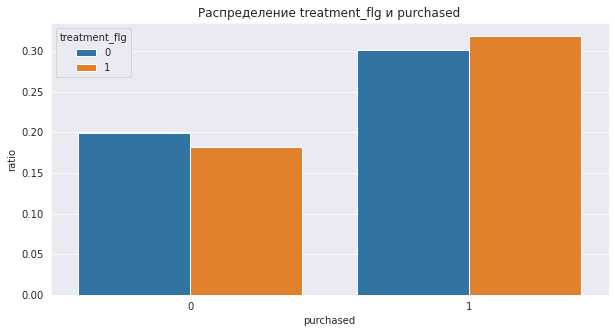

In [10]:
#посмотрим на распределение treatment_flg и purchased
X = df_train.groupby(["treatment_flg", "purchased"], as_index=False).size() \
  .assign(ratio = lambda x: x["size"] / x["size"].sum() ) 

fig, ax = plt.subplots(figsize = (10, 5))
ax=sns.barplot(data=X, x='purchased', y='ratio', hue='treatment_flg')
ax.set(title='Распределение treatment_flg и purchased')  
plt.show()

**Мысли**:

* При одном и том же значении purchased доля людей, с которыми была совершена коммуникация примерно равна доле людей, с которыми не происходило коммуникации.
* Совершивших покупку людей больше, чем тех, кто ее не совершал.

<h2>clients2.csv</h2>
<a id='section_id1.2'></a>

In [11]:
df_clients = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/data/clients2.csv',
                         parse_dates=["first_issue_date", "first_redeem_date"])

In [12]:
get_info(df_clients)

Обзор таблицы:


,client_id,client_id.1,first_issue_date,first_redeem_date,age,gender
0,000012768d,NaN,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,NaN,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,00010925a5,NaN,2018-07-24 16:21:29,2018-09-14 16:12:49,83,U
3,0001f552b0,NaN,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
4,00020e7b18,NaN,2017-11-27 11:41:45,2018-01-10 17:50:05,73,U


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200039 entries, 0 to 200038
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   client_id          200039 non-null  object        
 1   client_id.1        0 non-null       float64       
 2   first_issue_date   200039 non-null  datetime64[ns]
 3   first_redeem_date  182493 non-null  datetime64[ns]
 4   age                200039 non-null  int64         
 5   gender             200039 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 9.2+ MB
****************************************************************************************************
Дополнительные характеристики данных в таблице:


,client_id.1,age
count,0.0,200039.000000
mean,NaN,46.417329
std,NaN,49.532475
min,NaN,-7491.000000
25%,NaN,34.000000
50%,NaN,45.000000
75%,NaN,59.000000
max,NaN,1852.000000


,client_id,gender
count,200039,200039
unique,200039,3
top,000012768d,U
freq,1,92832


****************************************************************************************************
Кол-во строк и столбцов:
(200039, 6)
****************************************************************************************************
Кол-во пропусков:


client_id            0.000000
client_id.1          1.000000
first_issue_date     0.000000
first_redeem_date    0.087713
age                  0.000000
gender               0.000000
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


<h2>Описание переменных</h2>

**client_id** - уникальный идентификатор покупателя<br>
**client_id.1** - неизвестный столбец<br>
**first_issue_date** - дата первой покупки<br>
**first_redeem_date** - дата первого использования бонусных баллов<br>
**age** - возраст покупателя<br>
**gender** - пол покупателя

**Мысли**:

* Появились первые пропуски - в признаке `first_redeem_date`.  Можно заполнить пустые ячейки следующим днем после последнего дня в first_redeem_date - 21 ноября 2019. Также полностью незаполнен столбец client_id.1 (его надо совсем убрать)
* Имеются заведомо ложные значения возраста: max=1852, min=-7491?! Стоит оставить возраста от 14 лет до 100 лет (вполне разумные значения), а остальные значения заменить, например, на -2 (если возраст >100 лет) и -3 (если возраст < 14 лет). Предварительно построить график распределения возраста клиентов (возможно вскроются причины несостыковки с логикой)
* Посмотреть сколько мужчин, женщин и не отметивших пол клиентов
* Посмотреть по дням сколько людей совершали свою первую покупку и сколько людей впервые использовали бонусные баллы (построить графики)
* Создать временные признаки, связанные с `first_redeem_date` и `first_issue_date`: день недели, месяц, дата события (количество дней с 1 января 1970г)
* Можно создать признак - разницу между `first_redeem_date` и `first_issue_date`
* Категориальную переменную `gender`, которая принимает значения M, F, U преобразовать в числовую переменную, принимающую значения 0 - M, 1 - F, 2 - U

 

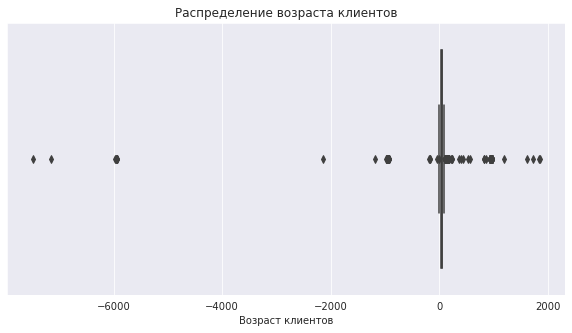

In [13]:
#посмотрим на распределение возраста клиентов

fig, ax = plt.subplots(figsize = (10, 5))
ax=sns.boxplot(x='age',data=df_clients)
ax.set(xlabel='Возраст клиентов', title='Распределение возраста клиентов')  
plt.show()

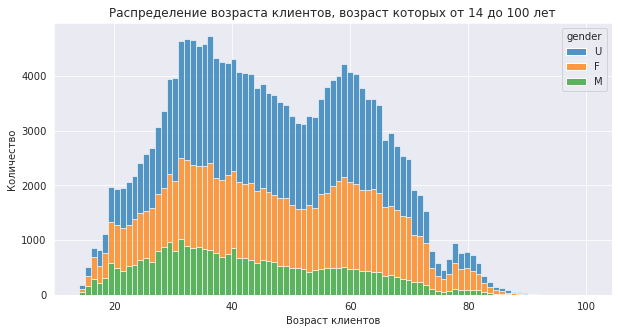

In [14]:
#посмотрим на распределение после отсечения заведомо ложных возрастов

fig, ax = plt.subplots(figsize = (10, 5))
ax=sns.histplot(x='age',
             data=df_clients[(df_clients.age<=100) & (df_clients.age>=14)], 
             bins=87, hue='gender', multiple='stack')
ax.set(xlabel='Возраст клиентов', ylabel='Количество',
      title='Распределение возраста клиентов, возраст которых от 14 до 100 лет')  
plt.show()

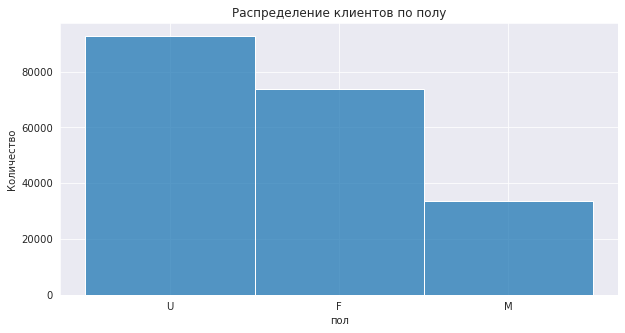

In [15]:
#посмотрим на распределение по полу

fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x='gender', data=df_clients)
ax.set(xlabel='пол', ylabel='Количество',
      title='Распределение клиентов по полу')  
plt.show()

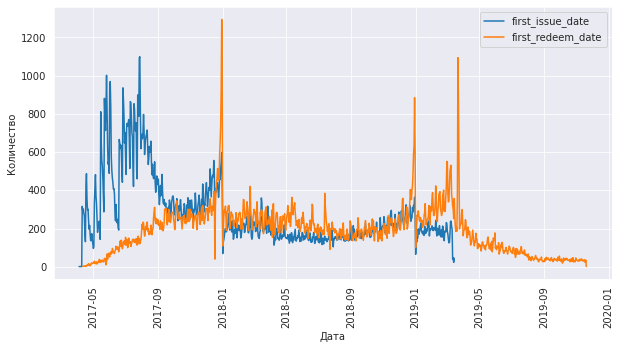

In [16]:
#графики распределений количества людей, у которых общая дата первой покупки, и 
#первого использования бонусных баллов

fig, ax = plt.subplots(figsize = (10, 5))
clients_date = df_clients.assign(first_issue_date=lambda x: x["first_issue_date"].dt.date)
clients_date_count = clients_date.groupby(['first_issue_date'],as_index=False)['client_id'].count()
clients_date_count.rename(columns={"client_id": "count"},inplace=True)
sns.lineplot(data=clients_date_count, x="first_issue_date", y="count",
             label="first_issue_date", ax=ax)

clients_date = df_clients.assign(first_redeem_date=lambda x: x["first_redeem_date"].dt.date)
clients_date_count = clients_date.groupby(['first_redeem_date'],as_index=False)['client_id'].count()
clients_date_count.rename(columns={"client_id": "count"},inplace=True)
sns.lineplot(data=clients_date_count, x="first_redeem_date", y="count",
             label="first_redeem_date", ax=ax)

ax.set(xlabel="Дата", ylabel="Количество")
plt.xticks(rotation= 90)

del clients_date, clients_date_count

#видим, что имеются резкие пики для first_redeem_date под новый год и в марте-апреле
#2019 года

In [17]:
#client_id.1 - все ячейки не заполнены => удаляем
print(f'Уникальные client_id.1: {df_clients["client_id.1"].unique()}\n')
df_clients.drop(columns=['client_id.1'],inplace=True)

#first_issue_date - выведем первую и последнюю дату
print(f'first_issue_date: min - {df_clients["first_issue_date"].min()}, max - {df_clients["first_issue_date"].max()}')
#first_redeem_date - выведем первую и последнюю дату
print(f'first_redeem_date: min - {df_clients["first_redeem_date"].min()}, max - {df_clients["first_redeem_date"].max()}\n')

#заполнение пропусков
df_clients['first_redeem_date'] = df_clients['first_redeem_date'].fillna(datetime(2019, 11, 21, 0, 0))

#age - минимальный и максимальный
print(f'Age: min - {min(df_clients["age"])}, max - {max(df_clients["age"])}')
# -7491 и 1852??! - сделаем адекватную оценку возраста и посмотрим на выбросы
print(f'Кол-во людей возраст которых больше 100 лет: {(df_clients["age"]>100).sum()}. Меньше 14 лет: {(df_clients["age"]<14).sum()}\n')

#gender - сколько мужчин, женщин и не указавших пол
display(df_clients.groupby('gender').size())

Уникальные client_id.1: [nan]

first_issue_date: min - 2017-04-04 18:24:18, max - 2019-03-15 21:44:14
first_redeem_date: min - 2017-04-11 09:42:20, max - 2019-11-20 01:14:10

Age: min - -7491, max - 1852
Кол-во людей возраст которых больше 100 лет: 521. Меньше 14 лет: 362



gender
F    73696
M    33511
U    92832
dtype: int64

In [18]:
#доп фичи времени по first_issue_date
df_clients['first_issue_date_weekday'] = df_clients['first_issue_date'].dt.weekday.astype('object')
df_clients['first_issue_date_month'] = df_clients['first_issue_date'].dt.month.astype('object')
df_clients['first_issue_time'] = (df_clients['first_issue_date'] - pd.Timestamp('1970-01-01'))//pd.Timedelta('1d')
#first_issue_time - количество дней с 1 января 1970 года


#доп фичи времени по first_redeem_date
df_clients['first_redeem_date_weekday'] = df_clients['first_redeem_date'].dt.weekday.astype('object')
df_clients['first_redeem_date_month'] = df_clients['first_redeem_date'].dt.month.astype('object')
df_clients['first_redeem_time'] = (df_clients['first_redeem_date'] - pd.Timestamp('1970-01-01'))//pd.Timedelta('1d')
#first_redeem_time - количество дней с 1 января 1970 года
df_clients['diff'] = df_clients['first_redeem_time']-df_clients['first_issue_time']


#преобразование категориальной переменной
df_clients['gender']=df_clients['gender'].map({'M': 0, 'F': 1, 'U': 2})

#df_clients.head()

In [19]:
def replace_age(df_clients):
    'Если возраст больше 100 лет, то записываю -2'
    'Если возраст меньше 14 лет, то записываю -3'
    age = df_clients['age'].values
    age[age >100] = -2
    age[age < 14] = -3
    df_clients['age']=age

    return df_clients


df_clients = replace_age(df_clients)

<h2>products.csv</h2>
<a id='section_id1.3'></a>

In [20]:
df_products = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/data/products.csv')

In [21]:
get_info(df_products)

Обзор таблицы:


,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43038 entries, 0 to 43037
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        43038 non-null  object 
 1   level_1           43035 non-null  object 
 2   level_2           43035 non-null  object 
 3   level_3           43035 non-null  object 
 4   level_4           43035 non-null  object 
 5   segment_id        41466 non-null  float64
 6   brand_id          37838 non-null  object 
 7   vendor_id         43004 non-null  object 
 8   netto             43035 non-null  float64
 9   is_own_trademark  43038 non-null  int64  
 10  is_alcohol        43038 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.6+ MB
***********************************************************************************************

,segment_id,netto,is_own_trademark,is_alcohol
count,41466.000000,43035.000000,43038.000000,43038.000000
mean,153.918222,0.536966,0.035178,0.055602
std,82.271376,8.274367,0.184232,0.229154
min,1.000000,0.000000,0.000000,0.000000
25%,105.000000,0.150000,0.000000,0.000000
50%,148.000000,0.300000,0.000000,0.000000
75%,214.000000,0.500000,0.000000,0.000000
max,321.000000,1150.000000,1.000000,1.000000


,product_id,level_1,level_2,level_3,level_4,brand_id,vendor_id
count,43038,43035,43035,43035,43035,37838,43004
unique,43038,3,42,201,790,4296,3193
top,0003020d3c,e344ab2e71,52f13dac0c,ca69ed9de2,420c3b3f0b,0d6f137fb6,43acd80c1a
freq,1,22183,8891,3737,2500,4344,1514


****************************************************************************************************
Кол-во строк и столбцов:
(43038, 11)
****************************************************************************************************
Кол-во пропусков:


product_id          0.000000
level_1             0.000070
level_2             0.000070
level_3             0.000070
level_4             0.000070
segment_id          0.036526
brand_id            0.120823
vendor_id           0.000790
netto               0.000070
is_own_trademark    0.000000
is_alcohol          0.000000
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


<h2>Описание переменных</h2>

**product_id** - уникальный идентификатор продукта<br>
**level_1-4** - подкатегории товара<br>
**segment_id** - уникальный идентификатор сегмента рынка<br>
**brand_id** - уникальный идентификатор бренда товара<br>
**vendor_id** - уникальный идентификатор продавца/поставщика товара<br>
**netto** - масса нетто товара<br>
**is_own_trademark** -продукция собственного производства<br>
**is_alcohol** - алкогольная продукция

**Мысли**:

* Разнообразие товаров собственного производства и алкогольной продукции гораздо меньше остальных видов продукции (первых 3.5% от общего количества, вторых 5.5%)
* Всего 3 уникальных подкатегории товара `level_1`
* Интересно, что в `level_1` - `level_4` одинаковое число пропусков (по 3). Нужно посмотреть, относятся ли эти пропуски к одним и тем же товарам (спойлер: да)
* Можно посмотреть количество уникальных категорий в `segment_id`, `is_own_trademark`, `is_alcohol`
* Какие признаки брать, а какие - нет, решу позже

In [22]:
#проверка того, что пропуски в level_1 в тех же товарах, у которых пропуски в 
#level_2 - level_4
df_products[df_products['level_1'].isna()]

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
796,04d86b4b50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
12219,48cc0e256d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
17818,6a3d708544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [23]:
#просмотр уникальных категорий, которых не было в describe
    
#segment_id, is_own_trademark, is_alcohol
for col in ['segment_id', 'is_own_trademark', 'is_alcohol']:
    print(f'Уникальных категорий {col} : {df_products[col].nunique()}')
    
# is_own_trademark, is_alcohol - тут всего 2 уникальных значения, посмотрим какие
for col in ['is_own_trademark', 'is_alcohol']:
    print(f'Уникальные категории {col} : {df_products[col].unique()}')
    
#логично, что это значения 0 и 1 (но проверить стоило)    

Уникальных категорий segment_id : 116
Уникальных категорий is_own_trademark : 2
Уникальных категорий is_alcohol : 2
Уникальные категории is_own_trademark : [0 1]
Уникальные категории is_alcohol : [0 1]


<h2> train_purch.csv и test_purch.csv</h2>
<a id='section_id1.4'></a>

In [24]:
df_train_purch = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/train_purch/train_purch.csv',
                             parse_dates = ['transaction_datetime'])
df_test_purch = pd.read_csv('/kaggle/input/uplift-shift-23/x5-uplift-valid/test_purch/test_purch.csv',
                            parse_dates = ['transaction_datetime'])

In [25]:
#соединим таблицы в одну
df_purch = pd.concat([df_train_purch, df_test_purch])
get_info(df_purch)

Обзор таблицы:


,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22882690 entries, 0 to 6883737
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   client_id                object        
 1   transaction_id           object        
 2   transaction_datetime     datetime64[ns]
 3   regular_points_received  float64       
 4   express_points_received  float64       
 5   regular_points_spent     float64       
 6   express_points_spent     float64       
 7   purchase_sum             float64       
 8   store_id                 object        
 9   product_id               object        
 10  product_quantity         float64       
 11  trn_sum_from_iss         float64       
 12  trn_sum_from_red         float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.4+ GB
*****************

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,1.513397e+06
mean,8.042838e+00,6.086653e-02,-5.299039e+00,-3.182563e-01,7.758724e+02,1.245971e+00,7.342165e+01,7.678150e+01
std,1.281378e+01,2.424006e+00,3.622378e+01,3.290094e+00,7.952956e+02,1.101945e+00,8.663618e+01,8.454373e+01
min,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.854900e+02,1.000000e+00,3.000000e+01,3.100000e+01
50%,3.700000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.380000e+02,1.000000e+00,5.100000e+01,5.500000e+01
75%,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.740000e+02,1.000000e+00,9.000000e+01,9.400000e+01
max,2.399000e+03,3.000000e+02,0.000000e+00,0.000000e+00,2.961148e+04,6.480000e+02,2.907400e+04,6.400000e+03


,client_id,transaction_id,store_id,product_id
count,22882690,22882690,22882690,22882690
unique,200039,4024941,13879,40716
top,3b32e0bc1b,f9a45c98e1,1f41964607,4009f09b04
freq,2247,116,10100,910569


****************************************************************************************************
Кол-во строк и столбцов:
(22882690, 13)
****************************************************************************************************
Кол-во пропусков:


client_id                  0.000000
transaction_id             0.000000
transaction_datetime       0.000000
regular_points_received    0.000000
express_points_received    0.000000
regular_points_spent       0.000000
express_points_spent       0.000000
purchase_sum               0.000000
store_id                   0.000000
product_id                 0.000000
product_quantity           0.000000
trn_sum_from_iss           0.000000
trn_sum_from_red           0.933863
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


In [26]:
del df_train_purch, df_test_purch
print(gc.collect())
#занимаемая память
return_memory(df_purch)

26841
2444 Mb


<h2>Описание переменных</h2>

**client_id** - уникальный идентификатор покупателя<br>
**transaction_id** - уникальный идентификатор транзакции<br>
**transaction_datetime** - дата проведения транзакции<br>
**regular_points_received** - сумма полученных бонусных баллов<br>
**express_points_received** - сумма полученных экстра-бонусных баллов<br>
**regular_points_spent** - сумма потраченных бонусных баллов<br>
**express_points_spent** - сумма потраченных экстра - бонусных баллов<br>
**purchase_sum** - сумма покупки<br>
**store_id** - уникальный идентификатор магазина<br>
**product_id** - уникальный идентификатор продукта<br>
**product_quantity** - кол-во (единиц) продукта<br>
**trn_sum_from_iss** - стоимость товара с учетом скидки<br>
**trn_sum_from_red** - пересчитанная стоимость товара на полке после применения скидки

**Мысли**:

* Видно, что ооочень много пропусков в столбце trn_sum_from_red, пропуски нужно заменить, например, на 0.
* Остальные ячейки таблицы все заполнены, дубликатов нет
* Можно проверить, имеются ли покупки, которые совершались клиентами не из списка train/test (спойлер: таких нет)
* Очень большой объем памяти занимает таблица, можно поиграться с типами данных. Например float64 -> float16 или float32
* Можно добавить временные признаки, связанные с `transaction_datetime`: в который час, день недели, месяц было событие, а также добавить дату (количество дней с 1 января 1970г)
* Во многих столбцах записи об одной транзакции повторяются. Отличия заключаются только в купленном продукте. Поэтому не нужно суммировать каждую строчку (например, при подсчете суммы затрат), нужно брать только последнюю для каждой транзакции.

In [27]:
#берем только те покупки, которые были совершены клиентами из train+test выборки
df_purch = df_purch[df_purch['client_id'].isin(clients)]
get_info(df_purch)
#как оказалось, других клиентов и не было (но проверить стоило)

Обзор таблицы:


,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN


****************************************************************************************************
Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22882690 entries, 0 to 6883737
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   client_id                object        
 1   transaction_id           object        
 2   transaction_datetime     datetime64[ns]
 3   regular_points_received  float64       
 4   express_points_received  float64       
 5   regular_points_spent     float64       
 6   express_points_spent     float64       
 7   purchase_sum             float64       
 8   store_id                 object        
 9   product_id               object        
 10  product_quantity         float64       
 11  trn_sum_from_iss         float64       
 12  trn_sum_from_red         float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.4+ GB
*****************

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,2.288269e+07,1.513397e+06
mean,8.042838e+00,6.086653e-02,-5.299039e+00,-3.182563e-01,7.758724e+02,1.245971e+00,7.342165e+01,7.678150e+01
std,1.281378e+01,2.424006e+00,3.622378e+01,3.290094e+00,7.952956e+02,1.101945e+00,8.663618e+01,8.454373e+01
min,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.854900e+02,1.000000e+00,3.000000e+01,3.100000e+01
50%,3.700000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.380000e+02,1.000000e+00,5.100000e+01,5.500000e+01
75%,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.740000e+02,1.000000e+00,9.000000e+01,9.400000e+01
max,2.399000e+03,3.000000e+02,0.000000e+00,0.000000e+00,2.961148e+04,6.480000e+02,2.907400e+04,6.400000e+03


,client_id,transaction_id,store_id,product_id
count,22882690,22882690,22882690,22882690
unique,200039,4024941,13879,40716
top,3b32e0bc1b,f9a45c98e1,1f41964607,4009f09b04
freq,2247,116,10100,910569


****************************************************************************************************
Кол-во строк и столбцов:
(22882690, 13)
****************************************************************************************************
Кол-во пропусков:


client_id                  0.000000
transaction_id             0.000000
transaction_datetime       0.000000
regular_points_received    0.000000
express_points_received    0.000000
regular_points_spent       0.000000
express_points_spent       0.000000
purchase_sum               0.000000
store_id                   0.000000
product_id                 0.000000
product_quantity           0.000000
trn_sum_from_iss           0.000000
trn_sum_from_red           0.933863
dtype: float64

****************************************************************************************************
Кол-во дубликатов:
0


In [28]:
#в trn_sum_from_red пропуски заменим на 0
df_purch['trn_sum_from_red'] = df_purch['trn_sum_from_red'].fillna(0)
#ниже поменяем тип данных, тем самым уменьшим объем задействованной памяти
df_purch['regular_points_received'] = df_purch['regular_points_received'].astype('float32')
df_purch['express_points_received'] = df_purch['express_points_received'].astype('float16')
df_purch['regular_points_spent'] = df_purch['regular_points_spent'].astype('float32')
df_purch['express_points_spent'] = df_purch['express_points_spent'].astype('float16')
df_purch['product_quantity'] = df_purch['product_quantity'].astype('int32')
df_purch['purchase_sum'] = df_purch['purchase_sum'].astype('float32')
df_purch['trn_sum_from_iss'] = df_purch['trn_sum_from_iss'].astype('float32')
df_purch['trn_sum_from_red'] = df_purch['trn_sum_from_red'].astype('float32')

In [29]:
#занимаемая память
return_memory(df_purch) #почти в 2 раза уменьшил
gc.collect()

1659 Mb


42

In [30]:
#доп-ые фичи времени по transaction_datetime

#день недели от 0 до 6
df_purch['transaction_datetime_weekday'] = df_purch['transaction_datetime'].dt.weekday.astype('object')
#номер месяца от 1 до 12
df_purch['transaction_datetime_month'] = df_purch['transaction_datetime'].dt.month.astype('object')
#который час от 0 до 23
df_purch['transaction_datetime_hour'] = df_purch['transaction_datetime'].dt.hour
#количество дней с 1 января 1970 года
df_purch['transaction_datetime_time'] = (df_purch['transaction_datetime'] - pd.Timestamp('1970-01-01'))//pd.Timedelta('1d')

#df_purch.head()

**Построим различные графики**

Найдем самые популярные/редкие магазины и товары

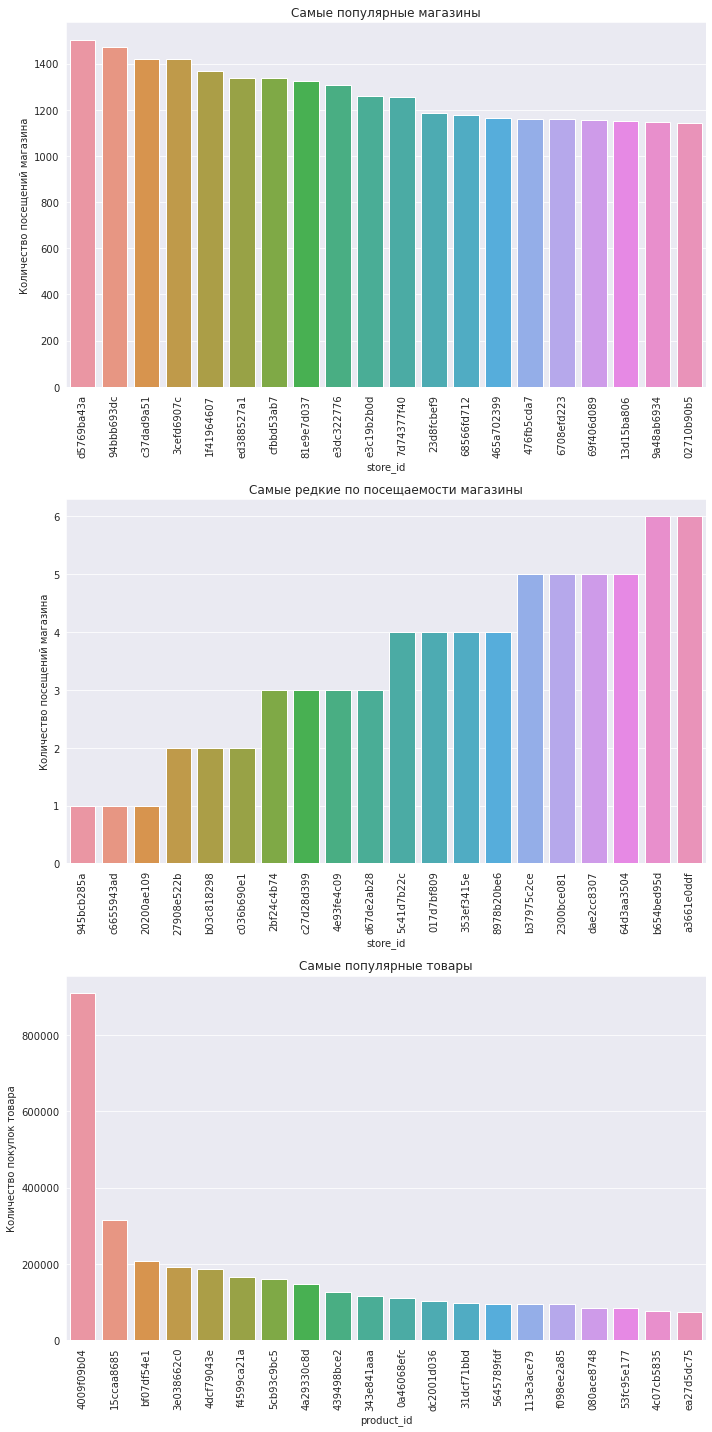

In [31]:
#вспомогательная таблица, где данные сгруппированы по id клиента и id транзакции
df_purch_group=df_purch.groupby(['client_id', 'transaction_id']).last()

#столбец количества посещений, индекс - store_id
df_store=df_purch_group.groupby('store_id')['transaction_datetime'].count()

# 20 самых популярных магазинов: 1ый столбец store_id, 2ой - число посещений
popular_stores=df_store.sort_values(ascending=False).reset_index().\
               rename(columns={'transaction_datetime': 'amount'}).head(20)

# 20 самых непопулярных магазинов: 1ый столбец store_id, 2ой - число посещений
unpopular_stores=df_store.sort_values(ascending=True).reset_index().\
               rename(columns={'transaction_datetime': 'amount'}).head(20)

#столбец количества посещений, индекс - store_id
df_tovar=df_purch.groupby('product_id')['store_id'].count()

# 20 самых популярных товаров: 1ый столбец product_id, 2ой - число покупок товара
popular_tovars=df_tovar.sort_values(ascending=False).reset_index().\
               rename(columns={'store_id': 'amount'}).head(20)

# # 20 самых непопулярных товаров: 1ый столбец product_id, 2ой - число покупок товара
# unpopular_tovars=df_tovar.sort_values(ascending=True).reset_index().\
#                rename(columns={'store_id': 'amount'}).head(20)

'''
как оказалось, всего 2571 товар, который покупали всего 1 раз, поэтому бессмысленно
строить график с самыми редкими товарами
'''

#графики
fig, axes = plt.subplots(3, 1, figsize=(10,20))

#популярные магазины
sns.barplot(ax=axes[0], x='store_id', y='amount', data=popular_stores) 
axes[0].set(xlabel='store_id', ylabel='Количество посещений магазина',
      title='Самые популярные магазины')  
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)

#непопулярные магазины
sns.barplot(ax=axes[1], x='store_id', y='amount', data=unpopular_stores) 
axes[1].set(xlabel='store_id', ylabel='Количество посещений магазина',
      title='Самые редкие по посещаемости магазины')  
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

#популярные товары
sns.barplot(ax=axes[2], x='product_id', y='amount', data=popular_tovars) 
axes[2].set(xlabel='product_id', ylabel='Количество покупок товара',
      title='Самые популярные товары')  
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=90)

# #непопулярные товары
# sns.barplot(ax=axes[3], x='product_id', y='amount', data=unpopular_tovars) 
# axes[3].set(xlabel='product_id', ylabel='Количество покупок товара',
#       title='Самые редкие товары')  
# axes[3].set_xticklabels(axes[3].get_xticklabels(),rotation=90)

fig.tight_layout()
plt.show()

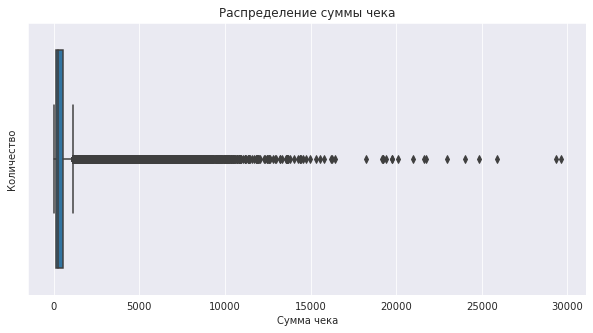

In [32]:
#посмотрим на распределение по сумме чека

fig, ax = plt.subplots(figsize = (10, 5))

sns.boxplot(x='purchase_sum', data=df_purch_group)
ax.set(xlabel='Сумма чека', ylabel='Количество',
      title='Распределение суммы чека')  
plt.show()

В подавляющем большинстве случаев, сумма чека при покупке не превосходит 1000, но
есть немало покупок, чек которых больше 1000, даже есть покупки на почти 30000.

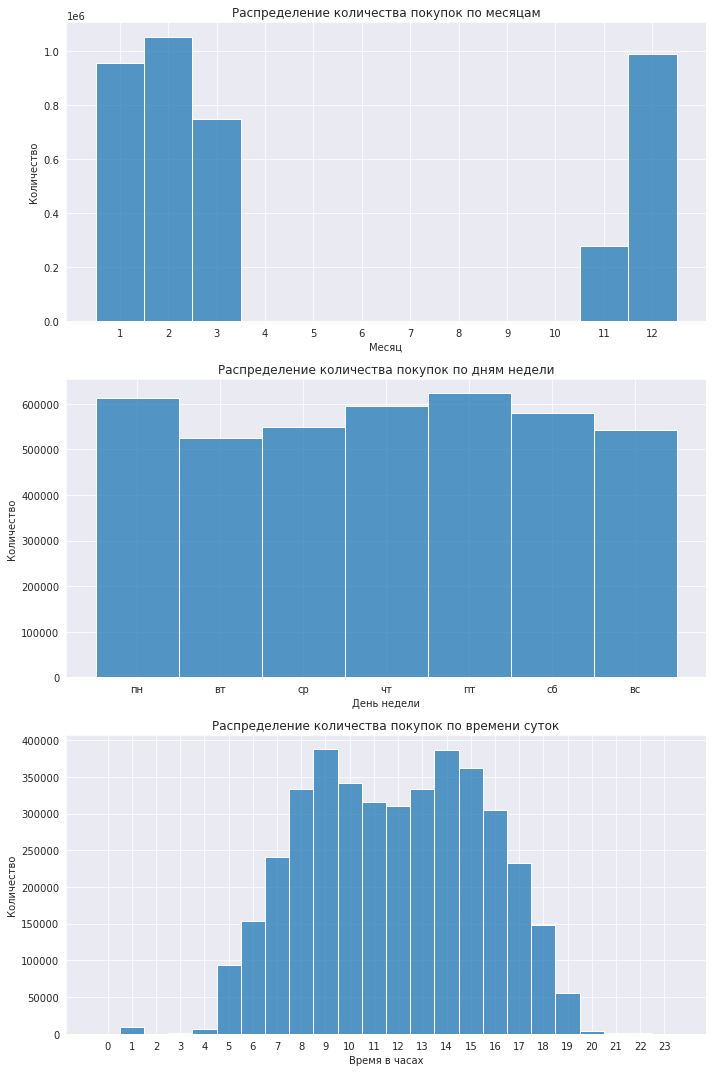

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(10,15))

#по месяцам
sns.histplot(ax=axes[0], x='transaction_datetime_month', data=df_purch_group, 
             discrete=True) 
axes[0].set(xlabel='Месяц', ylabel='Количество', xticks=np.arange(1, 13, 1),
      title='Распределение количества покупок по месяцам')  

#по дням недели
sns.histplot(ax=axes[1], x='transaction_datetime_weekday', data=df_purch_group, 
             discrete=True) 
axes[1].set(xlabel='День недели', ylabel='Количество', xticks=np.arange(0, 7, 1), 
            xticklabels=['пн','вт','ср', 'чт', 'пт','сб', 'вс'],
            title='Распределение количества покупок по дням недели')  

#по часам
sns.histplot(ax=axes[2], x='transaction_datetime_hour', data=df_purch_group, 
             discrete=True) 
axes[2].set(xlabel='Время в часах', ylabel='Количество', xticks=np.arange(0, 24, 1), 
      title='Распределение количества покупок по времени суток')  

fig.tight_layout()
plt.show()

#df_purch.transaction_datetime_month.unique() - покупки были только с ноября по март

Анализируя графики, можно прийти к выводу о том, что покупки происходили с ноября по март. В ноябре и в марте было совершено меньше покупок (это связано с тем, что покупки начали совершаться с середины ноября и закончились в середине марта). Распределение количества покупок по дням выглядит примерно равномерным несмотря на то, что казалось бы, что в выходные должно быть больше заказов. Распределение по времени суток явно не является равномерным - ночью заказов меньше, а пики наблюдаются в 9 утра и в 2 часа дня (14 часов).

# **Feature Engineering**
<a id='section_id2'></a>

Смержим инфу про продукты, покупки и клиентов

In [34]:
#merge products, purch, clients
df_all = pd.merge(df_purch, df_products, how='left', on='product_id')
df_all = pd.merge(df_all, df_clients, how='left', on='client_id')
print(df_all.shape)

#df_all.head(1)

(22882690, 38)


In [35]:
#занимаемая память
return_memory(df_all)
gc.collect()

6023 Mb


112

In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22882690 entries, 0 to 22882689
Data columns (total 38 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   client_id                     object        
 1   transaction_id                object        
 2   transaction_datetime          datetime64[ns]
 3   regular_points_received       float32       
 4   express_points_received       float16       
 5   regular_points_spent          float32       
 6   express_points_spent          float16       
 7   purchase_sum                  float32       
 8   store_id                      object        
 9   product_id                    object        
 10  product_quantity              int32         
 11  trn_sum_from_iss              float32       
 12  trn_sum_from_red              float32       
 13  transaction_datetime_weekday  object        
 14  transaction_datetime_month    object        
 15  transaction_datetime_hour     

**Мысли**:

* Сумма затрат перед использованием карты лояльности/после
* Для каждого клиента на каждый день недели: количество транзакций, сумма `trn_sum_form_iss`
* Для каждого часа: количество транзакций
* Для каждого клиента расчет`trn_sum_from_iss` суммы при покупке алкоголя/ при покупке собственной продукции. 
* Для каждого клиента подсчет количества покупок, `trn_sum_from_iss` сумма которых превосходит определенного значения.
* Для каждого клиента разность между последним и первым днем покупки.

    **Покупки за все время**:

* Сумма всех баллов и затрат
* Количество, среднее и стандартное отклонение транзакций
* Среднее и стандартное отклонение всех баллов
* Количество уникальных магазинов

    **Покупки за последний месяц**:
* Сумма всех баллов и затрат
* Количество транзакций
* Количество уникальных магазинов

**Сумма затрат и количество покупок перед использованием бонусной карты/после**
<a id='section_id2.1'></a>

In [37]:
def before_after_redeem_manipulations(df_clients, df):

    # Разница дат
    df['ord_diff'] = df['first_redeem_time'] - df['transaction_datetime_time']

    # Датафреймы с положительной/отрицательной разницей
    df_before = df[df['ord_diff'] > 0][['client_id', 'transaction_id', 'purchase_sum']]
    df_after = df[df['ord_diff'] <= 0][['client_id', 'transaction_id', 'purchase_sum']]

    # Берем последнюю запись (уже говорилось ранее почему при просмотре таблицы df_purch)
    df_before_all = df_before.groupby(['client_id', 'transaction_id']).last()
    df_after_all = df_after.groupby(['client_id', 'transaction_id']).last()

    # Считаем суммы
    ds_before_sum = df_before_all.groupby('client_id')['purchase_sum'].sum()
    ds_after_sum = df_after_all.groupby('client_id')['purchase_sum'].sum()

    # Считаем количество операций
    ds_before_counters = df_before_all.groupby('client_id')['purchase_sum'].count()    
    ds_after_counters = df_after_all.groupby('client_id')['purchase_sum'].count()    

    ds_before_sum.name = 'before_redeem_sum'
    ds_after_sum.name = 'after_redeem_sum'

    ds_before_counters.name = 'before_redeem_counter'
    ds_after_counters.name = 'after_redeem_counter'

    # Мержим
    df_clients = pd.merge(df_clients, ds_before_sum, how='left', on='client_id')    
    df_clients = pd.merge(df_clients, ds_after_sum, how='left', on='client_id')    

    df_clients = pd.merge(df_clients, ds_before_counters, how='left', on='client_id')    
    df_clients = pd.merge(df_clients, ds_after_counters, how='left', on='client_id')     
    
    return df_clients

#тут же вызываем
df_clients = before_after_redeem_manipulations(df_clients, df_all)

**Для каждого клиента на каждый день недели: количество транзакций, сумма `trn_sum_from_iss`**
<a id='section_id2.2'></a>

In [38]:
def day_of_week_manipulations(df_clients, df):

    for i in range(7):
        # Группируем по каждому дню недели
        df_dayfiltered = df[df['transaction_datetime_weekday'] == i][['client_id', 'transaction_id', 
                                                                   'transaction_datetime_weekday', 'trn_sum_from_iss']]
        ds_purch_day_of_week = df_dayfiltered.groupby(['client_id', 'transaction_id']).last()
        # Считаем количество транзакций по каждому дню недели
        ds_counters = ds_purch_day_of_week.groupby('client_id')['transaction_datetime_weekday'].count()
        ds_counters.name = f'amount_purch_in_dow_{i}'
        df_clients = pd.merge(df_clients, ds_counters, how='left', on='client_id')

        # Считаем сумму trn_sum_from_iss по каждому дню недели
        ds_purch_day_of_week = df_dayfiltered.groupby('client_id')['trn_sum_from_iss'].sum()
        ds_purch_day_of_week.name = f'total_sum_purch_in_dow_{i}'
        df_clients = pd.merge(df_clients, ds_purch_day_of_week, how='left', on='client_id')
        
    return df_clients

#тут же вызываем
df_clients = day_of_week_manipulations(df_clients, df_purch)

**Для каждого клиента на каждый час дня: количество транзакций (без суммы `trn_sum_from_iss`)**
<a id='section_id2.3'></a>

Схема такая же, как и в day_of_week_manipulations()

In [39]:
def hours_manipulations(df_clients, df):

    for i in range(24):
        df_hourfiltered = df[df['transaction_datetime_hour'] == i][['client_id', 'transaction_id', 'transaction_datetime_hour']]
        ds_purch_hour = df_hourfiltered.groupby(['client_id', 'transaction_id']).last()
        ds_counters = ds_purch_hour.groupby('client_id')['transaction_datetime_hour'].count()
        ds_counters.name = f'amount_purch_in_hour_{i}'
        df_clients = pd.merge(df_clients, ds_counters, how='left', on='client_id')

    return df_clients

#тут же вызываем
df_clients = hours_manipulations(df_clients, df_purch)

**а) Для каждого клиента расчет`trn_sum_from_iss` суммы при покупке алкоголя/ при покупке собственной продукции. <br> 
б) Для каждого клиента подсчет количества покупок, `trn_sum_from_iss` сумма которых превосходит определенного значения. <br>
в) Для каждого клиента разность между последним и первым днем покупки.**
<a id='section_id2.4'></a> <a id='section_id2.5'></a> <a id='section_id2.6'></a>

In [40]:
#df_all['trn_sum_from_iss'].describe()

#Сначала взял значения 1ого, 2ого, 3его квартиля, ну а вдобавок от себя пару значений, но потом 
#после подсчета парных коэффициентов корреляции понял, что нельзя так делать - будем сильная 
# корреляция со средним чеком покупки, поэтому было выбраны все значения от себя, но из 
#предположения о том, что это будет больше, чем значение 3его квартиля

sum_filter = [250, 500, 750, 1000, 2000] 

def trn_sum_manipulations(df_clients, df):
    
    # Считаем сумму 'trn_sum_from_iss' для покупок алкоголя
    df_filtered = df[df['is_alcohol'] == 1][['client_id', 'trn_sum_from_iss']]
    ds_alco = df_filtered.groupby('client_id')['trn_sum_from_iss'].sum()
    ds_alco.name = 'sum_alco'
    df_clients = pd.merge(df_clients, ds_alco, how='left', on='client_id')    

    # Считаем сумму 'trn_sum_from_iss' для покупок собственной продукции
    df_filtered = df[df['is_own_trademark'] == 1][['client_id', 'trn_sum_from_iss']]
    ds_marked = df_filtered.groupby('client_id')['trn_sum_from_iss'].sum()
    ds_marked.name = 'sum_own_trademark'
    df_clients = pd.merge(df_clients, ds_marked, how='left', on='client_id')    
    
    # Rоличество покупок, сумма которых больше,чем пороговые значения в sum_filter
    for threshold in sum_filter:
        df_filtered = df[df['trn_sum_from_iss'] > threshold][['client_id', 'trn_sum_from_iss']]
        ds_threshold = df_filtered.groupby('client_id')['trn_sum_from_iss'].count()
        ds_threshold.name = f'amount_purch_where_sum_over_{threshold}'
        df_clients = pd.merge(df_clients, ds_threshold, how='left', on='client_id')    

    # Разность между последним/первым днем покупки
    df['delta_days'] = df.groupby('client_id')['transaction_datetime_time'].transform(lambda x: x.max()-x.min()+1)
    df_delta = df.groupby('client_id').last()['delta_days']
    df_clients = pd.merge(df_clients, df_delta, how='left', on='client_id')
    
    return df_clients

#тут же вызываем
df_clients = trn_sum_manipulations(df_clients, df_all)

Создано уже много признаков, в которых много пустых значений => заполним нулями

In [41]:
df_clients = df_clients.fillna(0)

<h2>Покупки за все время и за последний месяц</h2>
<a id='section_id2.7'></a>

In [42]:
last_cols = ['regular_points_received', 'express_points_received', 'regular_points_spent',
             'express_points_spent', 'purchase_sum', 'store_id']
grouped_cols = df_purch.groupby(['client_id', 'transaction_id'])[last_cols].last()
last_month = df_purch[df_purch['transaction_datetime'] >
                          '2019-02-18'].groupby(['client_id', 'transaction_id'])[last_cols].last()

In [43]:
features =  pd.concat([grouped_cols.groupby('client_id')['purchase_sum'].count(),
                       last_month.groupby('client_id')['purchase_sum'].count(),
                       grouped_cols.groupby('client_id')['purchase_sum'].mean(),
                       grouped_cols.groupby('client_id')['purchase_sum'].std(),
                       grouped_cols.groupby('client_id')['express_points_spent'].mean(),
                       grouped_cols.groupby('client_id')['express_points_spent'].std(),
                       grouped_cols.groupby('client_id')['express_points_received'].mean(),
                       grouped_cols.groupby('client_id')['express_points_received'].std(),
                       grouped_cols.groupby('client_id')['regular_points_spent'].mean(),
                       grouped_cols.groupby('client_id')['regular_points_spent'].std(),
                       grouped_cols.groupby('client_id')['regular_points_received'].mean(),
                       grouped_cols.groupby('client_id')['regular_points_received'].std(),
                       grouped_cols.groupby('client_id').sum(),
                       grouped_cols.groupby('client_id')[['store_id']].nunique(),
                       last_month.groupby('client_id').sum(),
                       last_month.groupby('client_id')[['store_id']].nunique(),
                      ],axis = 1)

features.columns = ['total_transactions_count', 'last_month_transactions_count',
                    'mean_purchase', 'std_purchase', 'mean_e_points_spent', 'std_e_points_spent',
                    'mean_e_points_recd', 'std_e_points_recd', 'mean_r_points_spent', 'std_r_points_spent',
                    'mean_r_points_recd', 'std_r_points_recd'] + \
                    list(c+"_sum_all" for c in last_cols) + list(c+"_sum_last_month" for c in last_cols)

features  = features.reset_index() #до этого момента client_id был индексом
features = features.fillna(0) # в дисперсиях есть пропуски

Объединяем фичи

In [44]:
df = df_clients.merge(features, how='inner', on='client_id')
df.shape

(200039, 86)

**Новые мысли по фичам**:

* Нужно убрать столбцы `first_issue_date` и `first_redeem_date`, т.к. уже есть столбцы `first_issue_time` и `first_redeem_time`, отражающие даты событий. 
* Для каждого клиента вычислить долю затрат на алкоголь от общих затрат, то же самое проделать с товарами собственного производства
* Разность между последним днем 19 марта 2019 года и `first_issue_time`,  `first_redeem_time` (хотя возможно появится сильная корреляция с другими временными признаками, потом нужно проверить)
* Для каждого клиента вычислить отношение количества покупок, сумма которых выше порогового значения к количеству покупок в целом
* Для каждого клиента вычислить долю покупок по количеству/ по сумме в каждый день недели
* Для каждого клиента вычислить долю покупок по количеству в каждый час дня
* Для каждого клиента вычислить долю покупок по количеству/ по сумме до и после использования бонусной карты
* Средняя сумма чека в день
* Средняя сумма потраченная на алкоголь/продукты собственного производства в день
* Средняя сумма покупки после первого использования бонусной карты в день
* Средняя сумма потраченных/полученных разных бонусных баллов в день
* Разность полученных баллов и потраченных за последний месяц

<a id='section_id2.8'></a>

In [45]:
def prepare_new_features(df):

    '''
    удаление столбцов first_issue_date и first_redeem_date (т.к. уже есть столбцы
    first_issue_time и first_redeem_time)
    '''
    df.drop(columns=['first_issue_date', 'first_redeem_date'],inplace=True)
    
    # доля затрат на алкоголь/собственную продукцию
    df['alco_ratio'] = df['sum_alco'] / df['purchase_sum_sum_all']
    df['own_trademark_ratio'] = df['sum_own_trademark'] / df['purchase_sum_sum_all']
    
    # разность между последним днем и датами
    cutoff_dt = date.toordinal(date(2019, 3, 19)) #тут номер дня с 1 января 1 года
    df['issue_diff'] = cutoff_dt - df['first_issue_time']
    df['redeem_diff'] = cutoff_dt - df['first_redeem_time']

    # отношение количества покупок выше порогового значения к количеству покупок в целом
    for threshold in sum_filter:
        df[f'sum_over_{threshold}_ratio'] = df[f'amount_purch_where_sum_over_{threshold}'] / df['total_transactions_count']

    # доля покупок в определенный день недели
    for i in range(7):
        df[f'amount_purch_ratio_in_dow_{i}'] = df[f'amount_purch_in_dow_{i}'] / df['total_transactions_count']
        df[f'total_sum_purch_ratio_in_dow_{i}'] = df[f'total_sum_purch_in_dow_{i}'] / df['purchase_sum_sum_all']

    # доля покупок в определенный час
    for i in range(24):
        df[f'amount_purch_ratio_in_hour_{i}'] = df[f'amount_purch_in_hour_{i}'] / df['total_transactions_count']

    # доля суммы покупок перед/после первого использования бонусной карты
    df['before_redeem_sum_ratio'] = df['before_redeem_sum'] / df['purchase_sum_sum_all']
    df['after_redeem_sum_ratio'] = df['after_redeem_sum'] / df['purchase_sum_sum_all']
    
    # доля количества покупок перед/после использования бонусной карты
    df['before_redeem_counter_ratio'] = df['before_redeem_counter'] / df['total_transactions_count']
    df['after_redeem_counter_ratio'] = df['after_redeem_counter'] / df['total_transactions_count']

    # средняя сумма покупок в день
    df['avg_spent_perday'] = df['purchase_sum_sum_all'] / df['delta_days']
    #сумма покупок алкоголя/товаров собственного производства в день
    df['sum_alco_perday'] = df['sum_alco'] / df['delta_days']
    df['sum_own_trademark_perday'] = df['sum_own_trademark'] / df['delta_days']
    
    # Средняя сумма покупки после первого использования бонусной карты в день
    df['after_redeem_sum_perday'] = df['after_redeem_sum'] / df['delta_days']
    
    # Средняя сумма потраченных/полученных разных бонусных баллов в день
    df['e_points_spent_perday'] = df['express_points_spent_sum_all'] / df['delta_days']
    df['r_points_spent_perday'] = df['regular_points_spent_sum_all'] / df['delta_days']
    df['e_points_received_perday'] = df['express_points_received_sum_all'] / df['delta_days']
    df['r_points_received_perday'] = df['regular_points_received_sum_all'] / df['delta_days']

    # баллы, оставшиеся в последний месяц
    df['r_points_available_last_month'] = df['regular_points_received_sum_last_month'] - df['regular_points_spent_sum_last_month']
    df['e_points_available_last_month'] = df['express_points_received_sum_last_month'] - df['express_points_spent_sum_last_month']    
    
    return df


#тут же вызываем
df=prepare_new_features(df)
print(df.shape)

(200039, 145)


Получили 145 столбцов в таблице `df` (столбец `client_id` и еще 144 фичи)

# **Анализ признаков**

<a id='section_id3'></a>
Проведем анализ получившихся признаков и удалим лишние из них. Лишними признаками будут являться те, которые сильно коррелируют с другими признаками, а также те, важность которых мала, если провести неглубокое обучение. Для этого воспользуемся библиотекой FeatureSelector.

In [46]:
'''Разделение на тренировочный и тестовый датасет'''

train_X = df_train.merge(df, how='inner', on='client_id')
train_X.drop(columns=['client_id'],inplace=True)

test_X = df_test.merge(df, how='inner', on='client_id')
test_X.drop(columns=['client_id'],inplace=True)

Отличие между тренировочным и тестовым датасетом заключается в том, что в тренировочном есть 2 столбца `treatment_flg` и `purchased`

Для использования функций библиотеки Feature Selector, нужно из `treatment_flg` и `purchased` сделать один`target`, который равен единице ,если `treatment_flg` равен`purchased` и 0 в противном случае.

In [47]:
train_X['target']=0
train_X['target']=(train_X['purchased']+train_X['treatment_flg']+1)%2

# удаляем колонки, из которых сгенерировали целевую переменную, 
#сохраняем в train_X_check, в котором будет искать плохие признаки
train_X_check = train_X.drop(columns=['treatment_flg', 'purchased'])

In [48]:
train=train_X_check.drop(columns = ['target']) #только признаки
train_labels = train_X_check['target'] #таргет

#создание Feature Selector
fs = FeatureSelector(data = train, labels = train_labels)

**Поиск признаков, в которых большое количество пропусков (вообще их не должно быть) и которые имеют сильную парную корреляцию**
<a id='section_id3.1'></a> <a id='section_id3.2'></a>

0 features with greater than 0.01 missing values.

52 features with a correlation magnitude greater than 0.70.



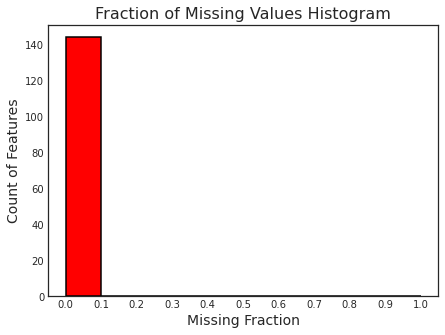

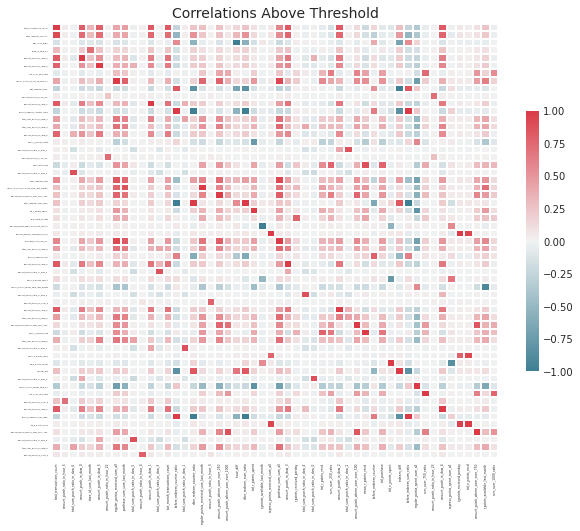

In [49]:
MISSING_RATIO_MAX = 0.01 
PAIR_CORRELATION_MAX = 0.7

'''фичи, в которых пропусков больше, чем missing_threshold'''
fs.identify_missing(missing_threshold = MISSING_RATIO_MAX)
fs.missing_stats
# список таких признаков
missing_features = fs.ops['missing'] 
fs.plot_missing()

'''фичи, парная корреляция между которых очень сильная'''
#correlation_threshold - порог, выше которого парная корреляция считается большой
fs.identify_collinear(correlation_threshold = PAIR_CORRELATION_MAX)
fs.plot_collinear()
# список таких признаков
collinear_features = fs.ops['collinear']
#fs.record_collinear # подробная информация о сильно коррелирующих признаках

**Проведем пробное обучение модели с помощью LGBM классификатора, чтобы выяснить наименее важные фичи (фичи нулевой важности)**
<a id='section_id3.3'></a>

Training Gradient Boosting Model


3 features with zero or negative importance after one-hot encoding.



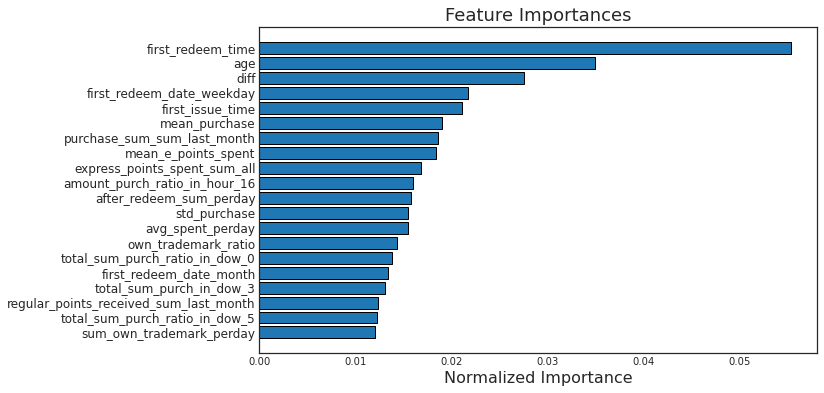

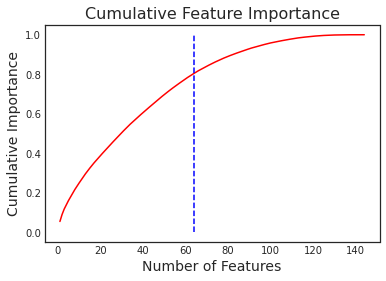

64 features required for 0.80 of cumulative importance



In [50]:
NUM_FEATURES_FOR_PLOT=20
THRESHOLD_IMPORTANCE=0.8

'''фичи нулевой важности'''
fs.identify_zero_importance(task='classification', eval_metric='auc', 
                            n_iterations=50, early_stopping=True)
#task=classification/regression
#eval_metric - метрика для ранней остановки (не нужна, если early_stopping=False)
#n_iterations - количество прогонов обучения для усреднения важности
#early_stopping - включение/отключение ранней остановки

#список таких признаков
zero_importance_features=fs.ops['zero_importance']

'''
Построение графиков: 1ый - самые важные признаки, 
2ой - распределение относительной важности признаков + определение количества
признаков, относительная важность которых больше threshold'''
fs.plot_feature_importances(threshold = THRESHOLD_IMPORTANCE, 
                            plot_n = NUM_FEATURES_FOR_PLOT)

'''
наименее важные признаки, которые не нужны для достижения cumulative_importance от
общей важности признаков (решил не искать их)
'''
#fs.identify_low_importance(cumulative_importance = 0.99)
#low_importance_features = fs.ops['low_importance']
print()

**Удаление "плохих" признаков**
<a id='section_id3.4'></a>

In [51]:
#получение списка признаков для удаления
features_to_delete=missing_features+collinear_features+zero_importance_features
print(len(features_to_delete))

#удаление плохих признаков (и еще столбца target)
train_X.drop(columns = features_to_delete+['target'], inplace=True)
test_X.drop(columns = features_to_delete, inplace=True)

55


# **Обучение моделей**
<a id='section_id4'></a>

Когда совершалось предобучение для поиска признаков нулевой важности, то из раза в раз количество таких признаков немного меняется (+-3 признака). В feature_selector вроде бы нельзя зафиксировать random_state, поэтому я решил сохранить один из результатов итоговых датасетов `train_X`, `test_X`.

In [52]:
# # Сохранение датасетов
# train_X.to_csv('train_X.csv',index=False)
# test_X.to_csv('test_X.csv',index=False)

#загрузка таблиц best_results и history_of_scores
train_X = pd.read_csv('/kaggle/input/final-datasets/train_X.csv')
test_X = pd.read_csv('/kaggle/input/final-datasets/test_X.csv')

**Деление на X_train, y_train и treat_train**

In [53]:
# Тренировочная выборка
X_train = train_X.drop(columns=['treatment_flg', 'purchased'])
y_train = train_X['purchased']
treat_train = train_X['treatment_flg']

**Построение модели машинного обучения.**
<a id='section_id4.1'></a>

В целом, решение поставленной задачи сводится к определению величины `uplift` для каждого клиента из тестового набора.

$$ uplift = A - B, $$
где <br>

$A$ - доля людей, совершивших покупку, от всех людей, с которые было произведено взаимодействие. <br>
$B$ - доля людей, совершивших покупку, от всех людей, с которые не было взаимодействия. <br>

То есть необходимо определить на сколько изменится вероятность покупки клиентом после воздействия на него. Существует несколько подходов к решению данной задачи:
- `Одна модель с признаком коммуникации`: модель обучается одновременно на двух группах, при этом бинарный флаг коммуникации выступает в качестве дополнительного признака. Каждый объект из тестовой выборки скорится дважды: с флагом коммуникации равным 1 и равным 0. Вычитая вероятности по каждому наблюдению, получается искомый uplift;
- `Одна модель с трансформацией классов`: данный подход основан на преобразовании, по сути, двух таргетов в один и обучении одной модели машинного обучения на данных с изменённой целевой переменной;
- `Две независимые модели`: подход заключается в моделировании условных вероятностей тестовой и контрольной групп отдельно;
- `Две зависимые модели`: идея состоит в том, что в начале обучается классификатор по контрольным данным, затем используются предсказания в качестве нового признака для обучения второго классификатора на тестовых данных

Выбор подхода будем осуществлять исходя из полученных результатов при каждом из них на валидационной выборке. Для решения задачи применялись следующие модели машинного обучения:
- LGBMClassifier
- CatBoostClassifier
- RandomForestClassifier

Подбор гиперпараметров осуществлялся методом байесовской оптимизации с помощью hyperopt - популярной python-библиотеки для подбора гиперпарметров. 

**Функция получения различных метрик**
<a id='section_id4.2'></a>

In [54]:
def get_scores(model,X_train, X_val, y_train, y_val, treat_train, treat_val):
    """ Принимается модель
        Возвращаются 3 вида score: 
        1) uplift_at_k - uplift в первых k наблюдениях (по умолчанию k=30%)
        2) uplift_auc_score - площадь под графиком аплифта(Area Under the Uplift Curve) 
        3) qini_auc_score - Area Under the Qini curve (aka Qini coefficient)
    """
    model.fit(X_train, y_train, treat_train)
    uplift = model.predict(X_val)
    upl_at_k = uplift_at_k(y_true=y_val, uplift=uplift, treatment=treat_val, 
                       strategy='by_group') #strategy- 'overall' или 'by_group'.
    upl_auc = uplift_auc_score(y_true=y_val, uplift=uplift, treatment=treat_val)
    upl_qini = qini_auc_score(y_true=y_val, uplift=uplift, treatment=treat_val)
    
    return {'upl_at_k': upl_at_k, 'upl_auc': upl_auc, 'upl_qini': upl_qini}

**Пространства гиперпараметров, инициализация кросс-валидатора**
<a id='section_id4.3'></a>

In [55]:
NUM_SPLITS=5

# инициализируем кросс-валидатор
kf = StratifiedKFold(n_splits = NUM_SPLITS, shuffle = True, random_state = 42)

#категориальные признаки
cat_feautures=['gender',
               'first_issue_date_weekday', 'first_issue_date_month',
               'first_redeem_date_weekday', 'first_redeem_date_month']


CatBoost_space = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
    'max_depth': hp.choice('max_depth', np.arange(2,11, 1,dtype=int)),
    'colsample_bylevel': hp.choice('colsample_bylevel', np.arange(0.3, 0.8, 0.1)),
    'iterations': hp.choice('iterations', np.arange(20,200, 5, dtype=int)),
    'early_stopping_rounds': hp.choice('early_stopping_rounds', np.arange(1,11, 1, dtype=int)),  
}

LGBM_space = {
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
        'max_depth': hp.randint('max_depth', 2, 11),
        'min_child_samples': hp.randint('min_child_samples', 5, 100),
        'subsample': hp.uniform('subsample', 0.7, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
        'num_leaves': hp.randint('num_leaves', 6, 50),
        'n_estimators': hp.randint('n_estimators', 200, 600),
        'boosting_type':  hp.choice('boosting_type', ['gbdt','dart'])
}

RandomForest_space ={
    'n_estimators': hp.randint('n_estimators', 200, 600), 
    'criterion':hp.choice('criterion',['gini', 'entropy']),
    'max_depth': hp.randint('max_depth', 2, 11),
    'min_samples_split':hp.randint('min_samples_split', 2, 50), 
    'min_samples_leaf':hp.randint('min_samples_leaf', 2, 50), 
    'min_weight_fraction_leaf':hp.uniform('min_weight_fraction_leaf', 0.0, 0.1) 
}

**Функция для вычисления погрешности измерения score модели**
<a id='section_id4.4'></a>

In [56]:
def mean_confidence_interval(data, confidence=0.95):
    '''
    Вычисление среднего значения случайной величины и ее случайной погрешности
    :data: - датафрейм измерений величины
    :confidence: доверительная вероятность
    return: m - среднее, h - погрешность'''
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sem(a)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return m, h

**Функция для вывода средних значений метрик и их погрешностей при кросс-валидации с текущими параметрами**
<a id='section_id4.5'></a>

In [57]:
CONFIDENCE=0.95 # доверительная вероятность

def objective(params, classification_type, model_type, kf, get_score,  X_full, 
              y_full, treatment_full):
    """
    Кросс-валидация с текущими гиперпараметрами
    :params: гиперпараметры
    :classification_type: CatBoostClassifier/LGBMClassifier/RandomForestClassifier
    :model_type: Solomodel/ClassTransformation/Two models
    :kf: KFolds
    :get_score: метрика
    :X_full: матрица признаков
    :y_full: вектор меток объектов
    :treatment_full: вектор наличия взаимодействия
    :num_folds: число фолдов в кросс-валидации
    :return: значение loss-функции, средняя точность и погрешность 
    для каждой метрики на кросс-валидации
    """ 
    # выбор модели
    if (classification_type == 'CatBoost'):
        cur_classification_type = CatBoostClassifier(cat_features=cat_feautures, 
                                                     random_state=42, 
                                                     silent=True,**params)
    elif (classification_type == 'LGBM'):
        cur_classification_type = LGBMClassifier(force_row_wise=True, verbose=-1, 
                                         random_state=42,**params)
    elif (classification_type == 'RandomForest'):
        cur_classification_type=RandomForestClassifier(random_state=42, 
                                                       verbose=0,**params)
    else:
        return None
    
    #выбор подхода к решению задачи
    if (model_type == 'SoloModel'):
        cur_model = SoloModel(estimator=cur_classification_type)
    elif (model_type == 'ClassTransformation'):
        cur_model=ClassTransformation(estimator=cur_classification_type)
    elif (model_type == 'TwoModels_independent'):
        cur_model=TwoModels(estimator_trmnt=cur_classification_type, 
                            estimator_ctrl=clone(cur_classification_type), 
                            method='vanilla')
    elif (model_type == 'TwoModels_dependent'):
        cur_model=TwoModels(estimator_trmnt=cur_classification_type, 
                            estimator_ctrl=clone(cur_classification_type), 
                            method='ddr_treatment')    
    else:
        return None
    
    
    # проводим кросс-валидацию
    folds = kf
    upl_at_k_scores, upl_auc_scores, upl_qini_scores = [], [], []
    #делим на тренировочные и валидационные датасеты
    for i, (train_index, valid_index) in enumerate(folds.split(X_full, y_full)):
        X_train, X_valid = X_full.iloc[train_index], X_full.iloc[valid_index]
        y_train, y_valid = y_full.iloc[train_index], y_full.iloc[valid_index]        
        treat_train, treat_valid = treatment_full.iloc[train_index], \
                                                     treatment_full.iloc[valid_index]
        #получаем scores для этого фолда
        scores = get_scores(cur_model,X_train, X_valid, y_train, y_valid, 
                                 treat_train, treat_valid)
        #заносим результаты в списки
        upl_at_k_scores.append(scores['upl_at_k'])
        upl_auc_scores.append(scores['upl_auc'])
        upl_qini_scores.append(scores['upl_qini'])
    
    #ищем средние значения и погрешности
    mean_upl_at_k_score, delta_upl_at_k_score =\
                      mean_confidence_interval(upl_at_k_scores, confidence=CONFIDENCE)
    mean_upl_auc_score, delta_upl_auc_score =\
                      mean_confidence_interval(upl_auc_scores, confidence=CONFIDENCE)
    mean_upl_qini_score, delta_upl_qini_score =\
                      mean_confidence_interval(upl_qini_scores, confidence=CONFIDENCE)
    
    #Значение Loss-функции будет рассчитываться как среднее mean_upl_auc_score с "-"
    

    # возвращаем результаты, которые записываются в Trials()
    return   {'loss': -mean_upl_auc_score, 
              'uplift_auc_score':mean_upl_auc_score, 
              'delta_uplift_auc_score': delta_upl_auc_score, 
              'uplift_qini_score':mean_upl_qini_score, 
              'delta_uplift_qini_score': delta_upl_qini_score,
              'uplift_at_k_score':mean_upl_at_k_score, 
              'delta_uplift_at_k_score': delta_upl_at_k_score,
              'params': params, 'status': STATUS_OK}

**Функция получения истории поиска оптимальных гиперпараметров для каждого типа модели**
<a id='section_id4.6'></a>

In [58]:
def find_hyperopt_results(max_evals, classification_type,model_type):
    '''
    получаем на вход:
    :classification_type: Catboost/Lgbmmodel...
    :model_type: Solomodel/Two models...
    :max_evals: количество итераций поиска оптимальных гиперпараметров
    :return: trials - результаты истории поиска оптимальных гиперпараметров'''
    if (classification_type == 'CatBoost'):
        space = CatBoost_space
    elif (classification_type == 'LGBM'):
        space = LGBM_space
    elif (classification_type == 'RandomForest'):
        space=RandomForest_space
    else:
        return None
    
    # запускаем hyperopt
    trials = Trials()
    best = fmin(
                fn=partial(objective, 
                           classification_type = classification_type,
                           model_type = model_type,
                           kf=kf,
                           get_score=get_scores, 
                           X_full=X_train, 
                           y_full=y_train, 
                           treatment_full = treat_train), # функция для оптимизации 
                space=space, # пространство поиска гиперпараметров  
                algo=tpe.suggest, # алгоритм поиска (байесовская оптимизация)
                max_evals=max_evals,# число итераций (можно ещё указать и время поиска) 
                trials=trials, # куда сохранять историю поиска
                rstate=np.random.default_rng(42), # random state
                show_progressbar=True # progressbar
    )
    return trials

**Функция поиска лучших значений метрик вместе с их погрешностями, а также параметров, при которых такие результаты достигаются**
<a id='section_id4.7'></a>

In [59]:
#в таком порядке будут перебираться модели
model_types=['SoloModel'] * 3 + ['ClassTransformation'] * 3 + \
    ['TwoModels_independent'] * 3 + ['TwoModels_dependent'] * 3
classification_types=['LGBM', 'CatBoost', 'RandomForest'] * 4


def find_best_params(trials_results):
    '''
    Поиск лучших результатов hyperopt в формате
    :trials_results: результаты hyperopt (trials.results)
    :return: лучший значение score его дисперсия для каждой из трех метрик 
    и параметры, при которых достигаются лучшие score'''
    results = pd.DataFrame([x for x in  trials_results])
    
    #поиск лучшего uplift_auc_score, его погрешности и параметров, при которых это
    #достигается
    results.sort_values(by=['uplift_auc_score'], ascending=False, inplace=True)
    best_uplift_auc_score=results.iloc[0]['uplift_auc_score']
    delta_of_best_uplift_auc_score=results.iloc[0]['delta_uplift_auc_score']
    best_params_for_uplift_auc_score=results.iloc[0]['params']
    
    #то же самое для qini_auc_score
    results.sort_values(by=['uplift_qini_score'], ascending=False, inplace=True)
    best_uplift_qini_score=results.iloc[0]['uplift_qini_score']
    delta_of_best_uplift_qini_score=results.iloc[0]['delta_uplift_qini_score']
    best_params_for_uplift_qini_score=results.iloc[0]['params']
    
    #то же самое для uplift_at_k
    results.sort_values(by=['uplift_at_k_score'], ascending=False, inplace=True)
    best_uplift_at_k_score=results.iloc[0]['uplift_at_k_score']
    delta_of_best_uplift_at_k_score=results.iloc[0]['delta_uplift_at_k_score']
    best_params_for_uplift_at_k_score=results.iloc[0]['params']
    
    return {'best_auc_score': best_uplift_auc_score, 
            'delta_of_best_auc_score':delta_of_best_uplift_auc_score, 
            'best_params_for_auc_score': best_params_for_uplift_auc_score,
            'best_qini_score': best_uplift_qini_score, 
            'delta_of_best_qini_score':delta_of_best_uplift_qini_score, 
            'best_params_for_qini_score': best_params_for_uplift_qini_score,
            'best_uplift_at_k_score': best_uplift_at_k_score, 
            'delta_of_best_uplift_at_k_score':delta_of_best_uplift_at_k_score, 
            'best_params_for_uplift_at_k_score': best_params_for_uplift_at_k_score}


**Функция получения датафрейма со значениями метрик и их погрешностями в зависимости от итерации подбора оптимальных гиперпараметров для заданного типа модели**
<a id='section_id4.8'></a>

In [60]:
def score_history(trials_results, classification_type, model_type):
    '''
    Получение значений score в зависимости от текущей итерации для каждой метрики
    :trials_results: результаты hyperopt (trials.results)
    return: pd.Series - значения score и их погрешности для каждй метрики, 
    индекс - номер итерации (нумерация с 0)
    '''
    results = pd.DataFrame([x for x in  trials_results])
    results.drop(columns=['loss', 'params', 'status'], inplace=True)
    
    ans=results.add_suffix(f'_for_{model_type}_with_{classification_type}') 
    return ans

**Функция получения двух датафреймов с результатами подбора гиперпараметров**
<a id='section_id4.9'></a>

In [61]:
def get_best_results_and_history(max_evals, model_types, classification_types):
    '''
    Получение двух таблиц: первая - best score и погрешность (для каждой метрики) 
    для каждой модели,
    вторая - зависимость score (с погрешностями) для каждой метрики от номера итерации
    :max_evals: количество итераций
    :model_types: список последовательности используемых подходов (SoloModel/...)
    :classification_types: список последовательности классификаторов (LGBM/...)
    '''
    #Таблица результатов score с каждой итерацией
    history_of_scores = pd.DataFrame(index=range(0,max_evals), 
                                     columns=['iteration'], 
                                     data=range(1,max_evals+1))
    
    # Таблица лучших результатов для каждой модели
    best_results = pd.DataFrame(columns=['model_type','classification_type',
                                         'best_auc_score','delta_of_best_auc_score',
                                         'best_params_for_auc_score',
                                         'best_qini_score','delta_of_best_qini_score',
                                         'best_params_for_qini_score',
                                         'best_uplift_at_k_score',
                                         'delta_of_best_uplift_at_k_score',
                                         'best_params_for_uplift_at_k_score'])
    
    for i in range(len(model_types)): #по сути это 12 - число различных моделей
        trials=find_hyperopt_results(max_evals, classification_types[i],model_types[i])
        best_scores_params=find_best_params(trials.results)
        #заполнение новой строчки таблицы с лучшими результатами
        best_results.loc[len(best_results.index)] = \
            [model_types[i], classification_types[i]] +list(best_scores_params.values())
        #Заполнение новых столбцов таблицы history_of_scores
        new_cols=score_history(trials.results, classification_types[i], model_types[i])
        history_of_scores = pd.concat([history_of_scores, new_cols], axis=1, 
                                      join='inner')
        
    return best_results, history_of_scores        

**Получение датафреймов с результатами подбора гиперпараметров**
<a id='section_id4.10'></a>

In [62]:
# NUM_ITERATIONS=20  #число итераций подбора гиперпараметров

# best_results, history_of_scores=get_best_results_and_history(NUM_ITERATIONS, 
#                                                              model_types,
#                                                              classification_types)

Получение таблиц `best_results` и `history_of_scores` занимает очень много времени: например при 20 итерациях это процесс занял порядка 10 часов, поэтому результаты выполнения функции get_best_results_and_history(20, model_types, classification_types) были сохранены и заново загружены в ноутбук, чтобы в дальнейшем не вызывать функцию вновь.

In [63]:
# #Сохранение
# best_results.to_csv('best_results_for_20_iter.csv',index=False)
# history_of_scores.to_csv('history_of_scores_for_20_iter.csv',index=False)


#загрузка таблиц best_results и history_of_scores
best_results = pd.read_csv('/kaggle/input/best-results-and-history-of-score-20-iters/best_results_for_20_iter.csv')
history_of_scores = pd.read_csv('/kaggle/input/best-results-and-history-of-score-20-iters/history_of_scores_for_20_iter.csv')



In [64]:
best_results.head()

,model_type,classification_type,best_auc_score,delta_of_best_auc_score,best_params_for_auc_score,best_qini_score,delta_of_best_qini_score,best_params_for_qini_score,best_uplift_at_k_score,delta_of_best_uplift_at_k_score,best_params_for_uplift_at_k_score
0,SoloModel,LGBM,0.031850,0.004304,"{'boosting_type': 'dart', 'colsample_bytree': ...",0.021708,0.003066,"{'boosting_type': 'dart', 'colsample_bytree': ...",0.075109,0.016458,"{'boosting_type': 'dart', 'colsample_bytree': ..."
1,SoloModel,CatBoost,0.026624,0.007124,"{'colsample_bylevel': 0.3, 'early_stopping_rou...",0.017842,0.004903,"{'colsample_bylevel': 0.3, 'early_stopping_rou...",0.065769,0.011660,"{'colsample_bylevel': 0.6000000000000001, 'ear..."
2,SoloModel,RandomForest,0.008045,0.006798,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.005132,0.004695,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.046117,0.015007,"{'criterion': 'entropy', 'max_depth': 3, 'min_..."
3,ClassTransformation,LGBM,0.036443,0.004933,"{'boosting_type': 'dart', 'colsample_bytree': ...",0.025201,0.003464,"{'boosting_type': 'dart', 'colsample_bytree': ...",0.079128,0.009447,"{'boosting_type': 'dart', 'colsample_bytree': ..."
4,ClassTransformation,CatBoost,0.036016,0.008549,"{'colsample_bylevel': 0.3, 'early_stopping_rou...",0.024889,0.005882,"{'colsample_bylevel': 0.3, 'early_stopping_rou...",0.080318,0.014709,"{'colsample_bylevel': 0.3, 'early_stopping_rou..."


In [65]:
history_of_scores.head()

,iteration,uplift_auc_score_for_SoloModel_with_LGBM,delta_uplift_auc_score_for_SoloModel_with_LGBM,uplift_qini_score_for_SoloModel_with_LGBM,delta_uplift_qini_score_for_SoloModel_with_LGBM,uplift_at_k_score_for_SoloModel_with_LGBM,delta_uplift_at_k_score_for_SoloModel_with_LGBM,uplift_auc_score_for_SoloModel_with_CatBoost,delta_uplift_auc_score_for_SoloModel_with_CatBoost,uplift_qini_score_for_SoloModel_with_CatBoost,...,uplift_qini_score_for_TwoModels_dependent_with_CatBoost,delta_uplift_qini_score_for_TwoModels_dependent_with_CatBoost,uplift_at_k_score_for_TwoModels_dependent_with_CatBoost,delta_uplift_at_k_score_for_TwoModels_dependent_with_CatBoost,uplift_auc_score_for_TwoModels_dependent_with_RandomForest,delta_uplift_auc_score_for_TwoModels_dependent_with_RandomForest,uplift_qini_score_for_TwoModels_dependent_with_RandomForest,delta_uplift_qini_score_for_TwoModels_dependent_with_RandomForest,uplift_at_k_score_for_TwoModels_dependent_with_RandomForest,delta_uplift_at_k_score_for_TwoModels_dependent_with_RandomForest
0,1,0.020389,0.010799,0.013641,0.007417,0.057232,0.015419,0.009511,0.010462,0.005973,...,0.010411,0.006218,0.055181,0.011382,0.015749,0.005870,0.010168,0.003947,0.050860,0.007752
1,2,0.017316,0.004682,0.011711,0.003056,0.054946,0.012077,0.023383,0.008363,0.015491,...,0.013276,0.006035,0.057522,0.012063,0.016487,0.007434,0.010690,0.004907,0.052228,0.015596
2,3,0.026534,0.007787,0.017937,0.005242,0.068398,0.016912,0.012424,0.008835,0.008024,...,0.006854,0.008663,0.042944,0.014773,0.018498,0.007649,0.012174,0.005019,0.052991,0.012457
3,4,0.013688,0.003050,0.008837,0.002087,0.052636,0.015194,0.021804,0.002590,0.014477,...,0.012855,0.006842,0.057242,0.005647,0.018114,0.007353,0.011796,0.004910,0.051177,0.012100
4,5,0.026429,0.001198,0.017666,0.001043,0.068534,0.010819,0.015453,0.012369,0.010063,...,0.013852,0.004023,0.057347,0.012200,0.018241,0.006486,0.011864,0.004347,0.053896,0.009673


**Функция отображения графика зависимости метрики от итерации (с возможностью построения планок погрешностей)**
<a id='section_id4.11'></a>

In [66]:
def draw_res(metrics_type, style, ax, results, model_types, 
             classification_types, plot_errors=False):
    '''
    Отрисовка зависимости Score от итерации для какой-то одной метрики для всех
    типов моделей
    :metrics_type: 'auc', 'qini', 'at_k' - тип исследуемой метрики
    :style: 'lineplot', 'scatterplot' - тип графика
    :ax: - где рисовать, на какой фигуре
    :results: из какой таблицы брать данные (history_of_scores)
    :model_types: Solomodel/...
    :classification_types: LGBM/...
    '''
    y_col=f'uplift_{metrics_type}_score_for_{model_types}_with_{classification_types}'

    if (style=='lineplot'):
        sns.lineplot(ax=ax, x='iteration',
                     y=y_col, 
                     data=results, 
                     label=f'{model_types}_{classification_types}') 

    elif (style=='scatterplot'):
        sns.scatterplot(ax=ax, x='iteration',
                        y=y_col, 
                     data=results, s=50, 
                     label=f'{model_types}_{classification_types}')
    
    if plot_errors:
        ax.errorbar(results['iteration'],results[y_col], 
                     yerr = results['delta_'+y_col], fmt ="o") #погрешности


    ax.set(xlabel='Iteration', ylabel=f'uplift_{metrics_type}_score')
    ax.set_title(f'Зависимость uplift_{metrics_type}_score от итерации',
                               fontweight='bold')


**Отображение зависимостей метрик от итерации подбора гиперпараметров**
<a id='section_id4.12'></a>

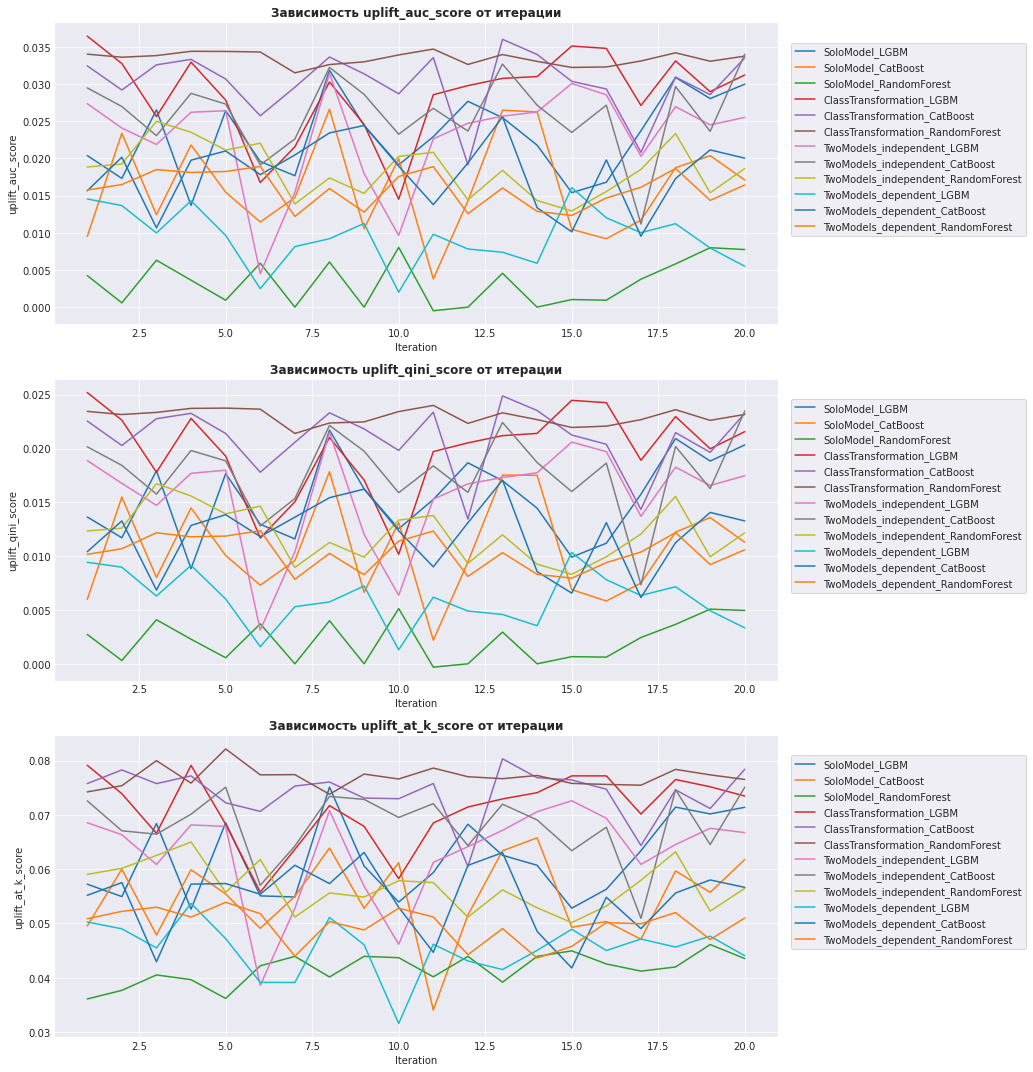

In [67]:
sns.set_style('darkgrid')
NUM_CURVES = 12 #количество различных моделей (4 модели * 3 классификатора)
NUM_METRICS = 3 #количество рассматриваемых метрик
METRICS = ['auc', 'qini', 'at_k'] #рассматриваемые метрики


fig, axes = plt.subplots(3, 1, figsize=(15,NUM_METRICS*5))
for num_metric in range(NUM_METRICS):
    for i in range(NUM_CURVES):
        draw_res(METRICS[num_metric],'lineplot',axes[num_metric], history_of_scores, 
                 model_types[i], classification_types[i])
    axes[num_metric].legend(bbox_to_anchor=(1.35, 0.95), frameon=True)

plt.tight_layout()
plt.show()

#Также имеется возможность построить те же графики, но в формате диаграммы рассеяния

Анализируя графики можно прийти к выводу о том, что зависимости `uplift_auc_score` и `qini_auc_score` пропорциональны друг другу (это интуитивно было понятно, но наглядно убедился в этом). Также можно заметить, что стабильно высокие значения метрик получаются в модели ClassTransformation + RandomForest, а также что Solomodel + RandomForest в паре выдают слабый результат. Построим далее гистограммы лучших значений метрик (с погрешностями) для каждой модели.

**Функция построения гистограмм с погрешностями**
<a id='section_id4.13'></a>

In [68]:
def grouped_barplot(ax, df, category_col,subcategory_col, val , err):
    '''
    Построение barplot с погрешностями
    :df: таблица, в которой есть столбцы: категория (model_type), 
    подкатегория (classification_type), value (best_score), 
    err (погрешность best_score)
    :category_col: колонка-категория таблицы df
    :subcategory_col: колонка-подкатегория таблицы df
    :val: колонка-значения таблицы df
    :err: колонка-погрешности таблицы df
    '''
    #список категорий (Solomodel, ...)
    categories_unique = df[category_col].unique() 
    
    #индекс категории (0,1,..., n)
    category_index = np.arange(len(categories_unique)) 
    
    #список подкатегорий (LGBM,...)
    subcategories_unique = df[subcategory_col].unique() 
    
    #смещение относительно координаты центра категории
    offsets = (np.arange(len(subcategories_unique))-np.arange(len(subcategories_unique)).mean())/(len(subcategories_unique)+1.)
    #ширина столбца
    width= np.diff(offsets).mean()
    for i,cur_subcat in enumerate(subcategories_unique):
        #таблица из строк, относящихся к текущей подкатегории
        df_cur_subcat = df[df[subcategory_col] == cur_subcat]
        ax.bar(category_index+offsets[i], df_cur_subcat[val].values, width=width, 
                label=f'{cur_subcat}', yerr=df_cur_subcat[err].values)
    ax.set(xlabel=category_col, ylabel=val,  xticks=category_index, 
           xticklabels=categories_unique)

**Функция добавления в гистограмму лейблов для каждого столбца**
<a id='section_id4.14'></a>

In [69]:
def add_value_labels(ax, spacing=0, where='center', angle=90):
    """Добавление лейблов для каждого столбца barplot'а
    Аргументы:
    ax (matplotlib.axes.Axes): matplotlib object содержащий axes графика
    spacing (int): Расстояние между лейблами и столбцами
    where: куда поместить надпись (bottom/center/top)
    angle: угол поворота надписи (0 - горизонталь, 90 - снизу вверх)
    """
    # Для каждого столбца:  размещение лейбла
    for rect in ax.patches:
        # Получение X и Y позиции лейбла
        if (where =='center'):
            y_value = rect.get_height()/2
        elif (where == 'top'):
            y_value = rect.get_height()
        elif (where == 'bottom'):
            y_value = rect.get_height()/10
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing #кол-во точек между столбцом и лейблом
        va = 'bottom' # такое выравнивание для положительных чисел

        if y_value < 0:
            space *= -1 # перевернем пространство, чтобы расположить лейбл
            va = 'top' # размещение лейбла под столбцом

        # Значение Y - это лейбл, формат 4 знака после запятой
        label = "{:.4f}".format(rect.get_height()) 

        # Создание комментария
        text =ax.annotate(
            label,                      # применяем `label` как label
            (x_value, y_value),         # местоположение
            xytext=(0, space),          # Вертикальный отступ лейбла от столбца 
            textcoords="offset points", # интерпретируем так`xytext` 
            ha='center',                # Центрирование по горизонтали лейбла 
            va=va)                      # Vertically align (va) - top/bottom
        text.set_rotation(angle)



**Построение гистограмм с погрешностями для каждой метрики для каждого типа модели**
<a id='section_id4.15'></a>

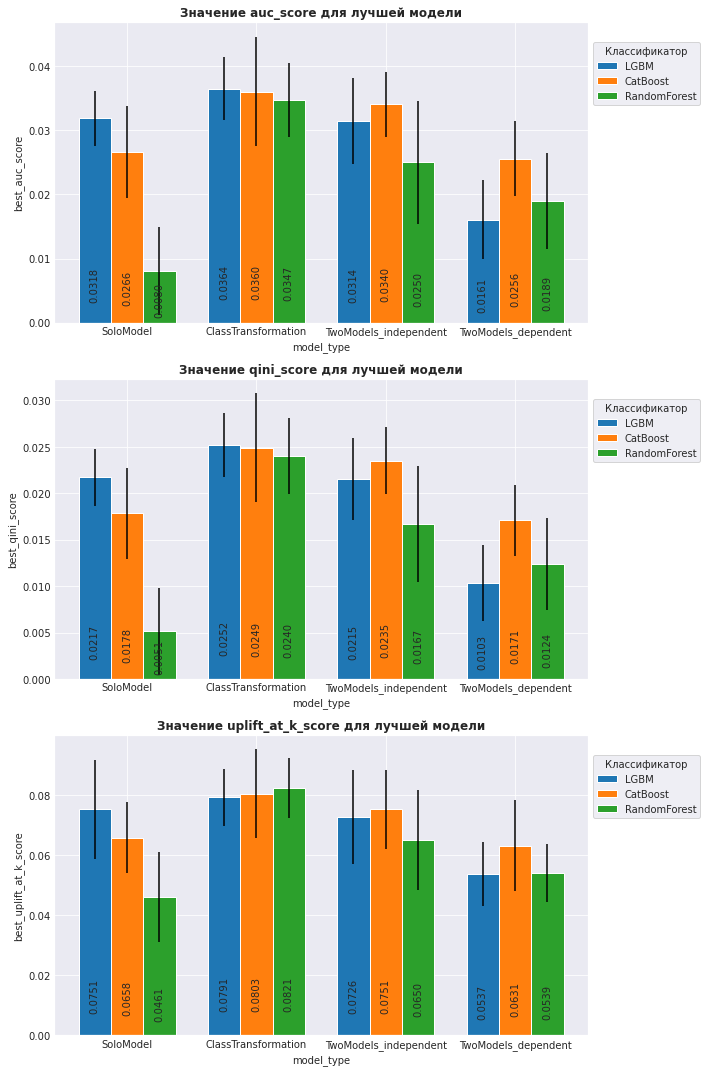

In [70]:
fig, axes = plt.subplots(NUM_METRICS, 1, figsize=(10,NUM_METRICS*5))
for num_metric in range(NUM_METRICS):
    if METRICS[num_metric]!='at_k':
        y_col=f'best_{METRICS[num_metric]}_score'
    elif METRICS[num_metric]=='at_k':  
        y_col=f'best_uplift_{METRICS[num_metric]}_score'
    delta_y_col='delta_of_'+y_col
    grouped_barplot(axes[num_metric], best_results, 'model_type', 'classification_type',
                    y_col, delta_y_col)
    axes[num_metric].legend(bbox_to_anchor=(1.22, 0.95), title='Классификатор',
                            frameon=True)
    y_col_for_title=y_col.replace('best_', '')
    axes[num_metric].set_title(f'Значение {y_col_for_title} для лучшей модели',
                               fontweight='bold') 
    add_value_labels(axes[num_metric], where='bottom')
    
plt.tight_layout()   
plt.show()

Видим, что модель типа `две зависимые модели` выдает плохие результаты при любом из рассматриваемом классификаторе ,в то время как модель `трансформация классов` ведет себя наилучшим образом с любым классификатором. Стоит заметить, что лучшее значение `auc_score` (`qini_score`) достигается с моделью `ClassTransformation + LGBMClassifier`, а лучшее значение `uplift_at_30%` достигается с моделью `ClassTransformation + RandomForest`. 

Думаю, что нужно для моделей, показавших лучшие значения метрик, попробовать еще раз поподбирать оптимальные гиперпараметры, но уже на большем количестве итераций.

# Работа с типом модели, показавшим лучшее значение метрики 
<a id='section_id5'></a>

**Функция получения связки модель + классификатор, для которых лучшее значение метрики**
<a id='section_id5.1'></a>

In [71]:
def find_best_model(type_best, best_results):
    '''
    :type_best: по какой метрике ищем лучшую модель
    :best_results: таблица со значениями best_score (для каждой метрики) для каждой 
    модели
    return: тип модели, классификатор, для которых score наилучший
    '''
    best_results.sort_values(by=[f'best_{type_best}_score'], ascending=False, inplace=True)
    
    #строчка в таблице, откуда считываем нужную информацию
    best_line= best_results.iloc[0]
    
    best_model_type, best_classification_type = \
                            best_line.model_type, best_line.classification_type
    print(f'Лучшая модель: {best_model_type} с классификатором {best_classification_type}')
    return best_model_type, best_classification_type

**Функция вывода на экран лучшего значения метрики с погрешностью**
<a id='section_id5.2'></a>

In [72]:
def print_best_score(metric, best_results_for_best_model):
    '''Вывести значение метрики и ее погрешность для лучшей модели'''
    score_col_name=f'best_{metric}_score' #имя столбца, где значение score
    delta_col_name='delta_of_'+score_col_name
    best_score, delta_of_best=best_results_for_best_model.iloc[0][score_col_name], \
                        best_results_for_best_model.iloc[0][delta_col_name]
    print(f'Best_{metric}_score: {best_score}')
    print(f'delta_of_best_{metric}_score: {delta_of_best}')

**Функция отображения результатов для лучшей модели относительно данной метрики**
<a id='section_id5.3'></a>

In [73]:
def get_results_for_best_model(type_best, num_iter_control):
    '''
    Поиск лучшей связки модель + классификатор для данной метрики, 
    Поиск оптимальных параметров на бОльшем количестве итераций,
    Построение графиков зависимости метрик от итерации подбора гиперпараметров,
    Вывод лучших значений метрик с погрешностями
    :type_best: 'auc'/ 'qini'/ 'uplift_at_k' - метрика, относительно которой 
    ищется лучшая связка модель + классификатор
    :num_iter_control: количество итераций подбора гиперпараметров
    :return: оптимальные гиперпараметры, тип модели и классификатора
    '''
    #получение связки модель + классификатор для данной метрики
    best_model_type, best_classification_type=\
                                     find_best_model(type_best, best_results)
    
    #таблицы результатов для данной модели
    best_results_for_best_model, history_of_scores_for_best_model=\
         get_best_results_and_history(num_iter_control, [best_model_type], 
                                      [best_classification_type])
    
    #графики зависимости значений метрики от итерации
    fig, axes = plt.subplots(3, 1, figsize=(15,NUM_METRICS*5))
    for num_metric in range(NUM_METRICS):
        draw_res(METRICS[num_metric], 'lineplot',axes[num_metric], 
                 history_of_scores_for_best_model, best_model_type, 
                 best_classification_type, plot_errors=True)
        axes[num_metric].legend(bbox_to_anchor=(1.25, 0.95), frameon=True)
    plt.tight_layout()
    plt.show()
    
    #получение лучших параметров для лучшей пары модель+классификатор
    params_best=f'best_params_for_{type_best}_score'
    best_params_for_best_model=best_results_for_best_model.iloc[0][params_best]
    
    #отображение значений метрик и их погрешностей
    print(f'Для модели с лучшим значением метрики {type_best} имеем:')
    print_best_score('auc',best_results_for_best_model)
    print_best_score('qini', best_results_for_best_model)
    print_best_score('uplift_at_k', best_results_for_best_model)
    
    return best_params_for_best_model, best_model_type, best_classification_type

**Получение результатов для лучшей модели относительно данной метрики**
<a id='section_id5.4'></a>

Относительно метрики `uplift_auc_score`
<a id='section_id5.4a'></a>

Лучшая модель: ClassTransformation с классификатором LGBM
100%|██████████| 50/50 [1:30:35<00:00, 108.71s/trial, best loss: -0.03644335678466346]


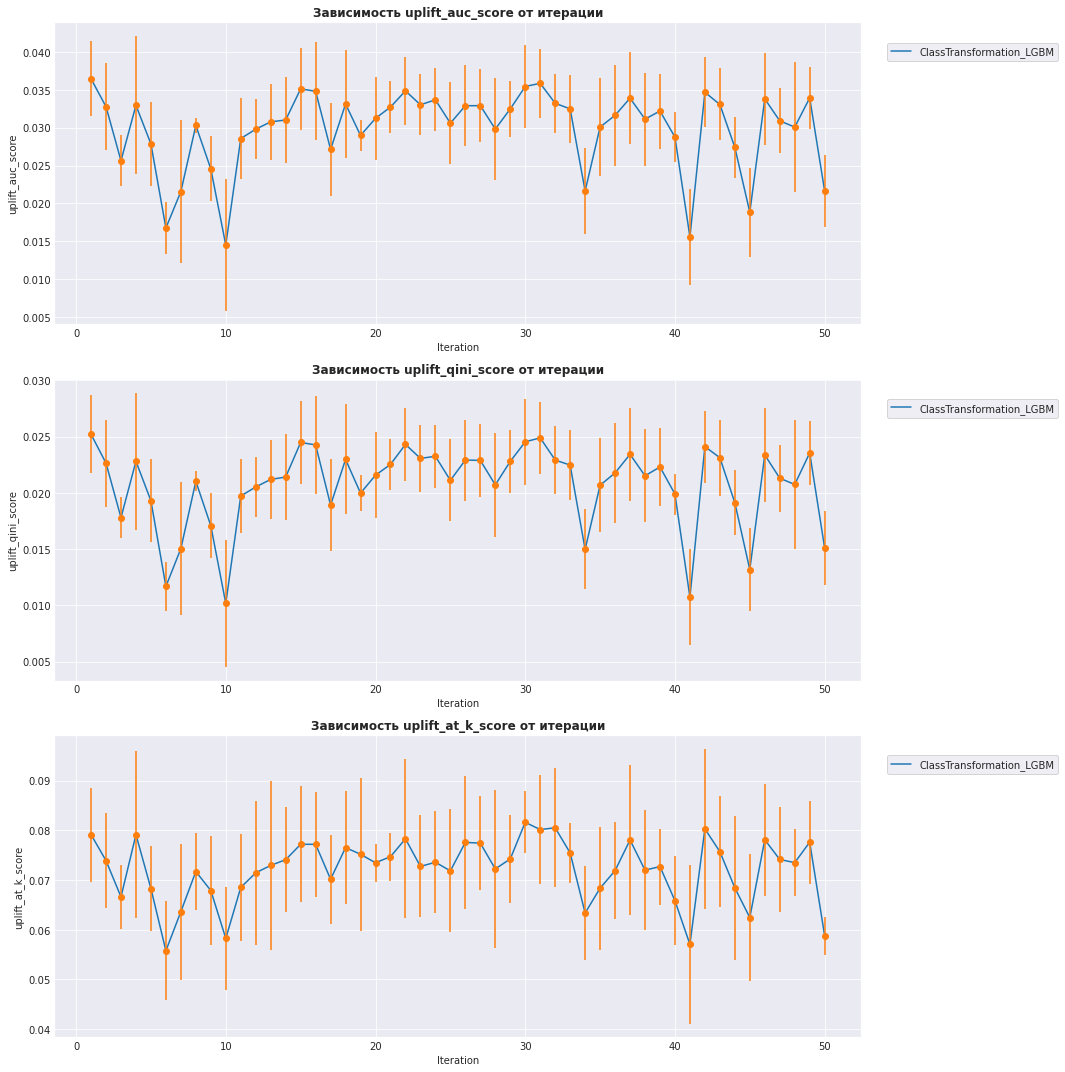

Для модели с лучшим значением метрики auc имеем:
Best_auc_score: 0.03644335678466346
delta_of_best_auc_score: 0.004933086789328714
Best_qini_score: 0.02520077621350273
delta_of_best_qini_score: 0.003464268119172255
Best_uplift_at_k_score: 0.08159952256837959
delta_of_best_uplift_at_k_score: 0.006240318649215236


In [74]:
sns.set_style('darkgrid')
NUM_ITERS_CONTROL=50
best_params_for_auc_best_model, best_auc_model_type, best_auc_classification_type =\
        get_results_for_best_model(type_best='auc', num_iter_control=NUM_ITERS_CONTROL)

Относительно метрики `uplift_at_30%`
<a id='section_id5.4b'></a>

Лучшая модель: ClassTransformation с классификатором RandomForest
100%|██████████| 50/50 [5:08:59<00:00, 370.79s/trial, best loss: -0.03470382254185061]


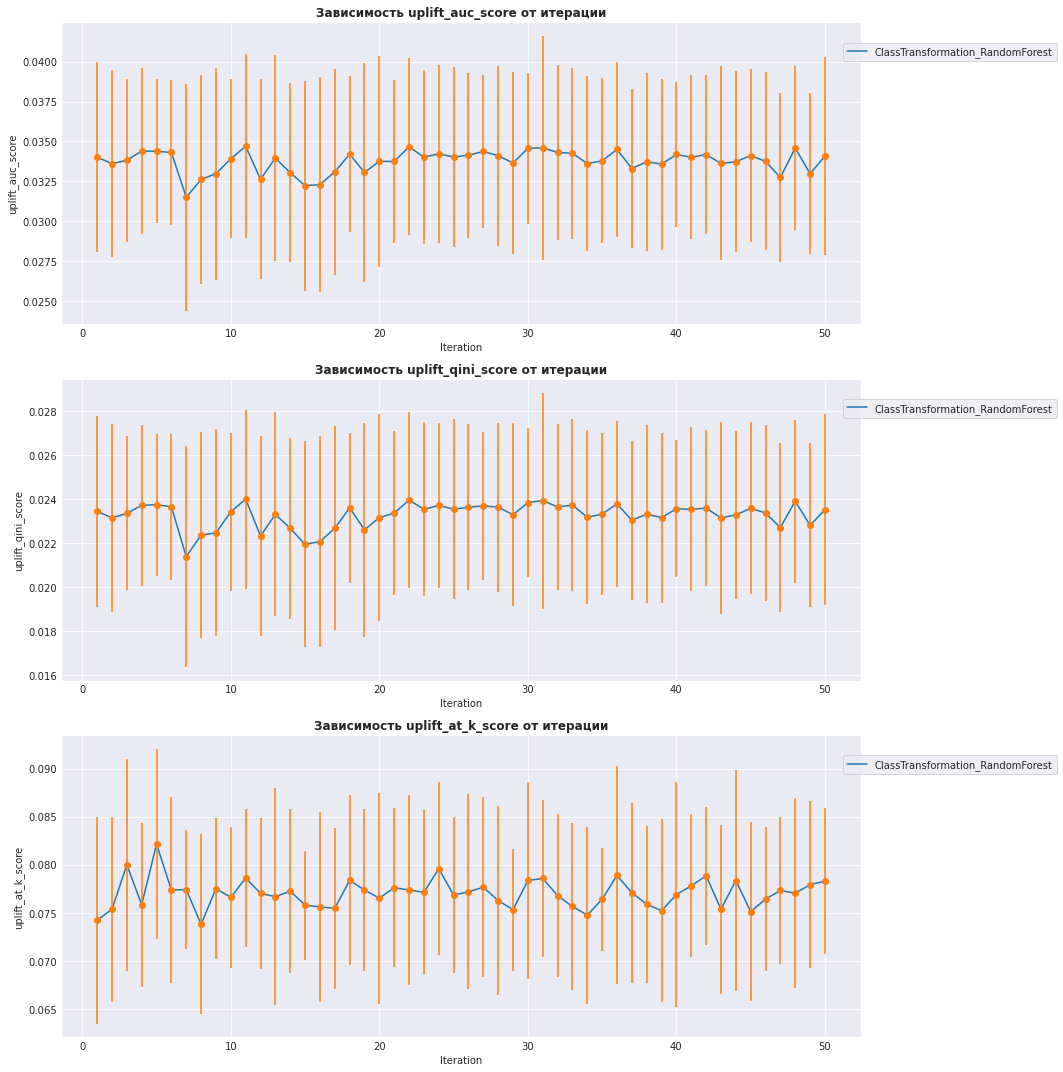

Для модели с лучшим значением метрики uplift_at_k имеем:
Best_auc_score: 0.03470382254185061
delta_of_best_auc_score: 0.005769601831707008
Best_qini_score: 0.024005205462113297
delta_of_best_qini_score: 0.004069055182877421
Best_uplift_at_k_score: 0.08213538119923094
delta_of_best_uplift_at_k_score: 0.009903859096391044


In [75]:
best_params_for_uplift_at_k_best_model, best_uplift_at_k_model_type, \
                                best_uplift_at_k_classification_type =\
            get_results_for_best_model(type_best='uplift_at_k', 
                                       num_iter_control=NUM_ITERS_CONTROL)

# Предсказания лучших моделей на тестовой выборке
<a id='section_id6'></a>

В постановке задачи указано, что необходимо пометить 1 тех клиентов, которым стоит отправлять СМС, к значению аплифта для каждого клиента прибавим 0.5. Таким образом при положительном значении аплифта клиент будет помечен 1, а при отрицательном 0.

Для этого создается лучшая связка модель+классификатор с лучшими гиперпараметрами, которая обучается на тренировочном датасете, а затем дает предсказания на тестовых данных.

**Функция создания модели с оптимальными значениями гиперпараметров**
<a id='section_id6.1'></a>

In [76]:
def get_final_model(params, classification_type, model_type):
    """
    Создание лучшей пары модель+классификатор
    :params: гиперпараметры
    :classification_type: CatBoostClassifier/LGBMClassifier/RandomForestClassifier
    :model_type: Solomodel/ClassTransformation/Two models
    :return: model (модель)
    """ 
    # выбор модели
    if (classification_type == 'CatBoost'):
        cur_classification_type = CatBoostClassifier(cat_features=cat_feautures, 
                                                     random_state=42, 
                                                     silent=True,**params)
    elif (classification_type == 'LGBM'):
        cur_classification_type = LGBMClassifier(force_row_wise=True, verbose=-1, 
                                         random_state=42,**params)
    elif (classification_type == 'RandomForest'):
        cur_classification_type=RandomForestClassifier(random_state=42, verbose=0,
                                                       **params)
    else:
        return None
    
    #выбор подхода к решению задачи
    if (model_type == 'SoloModel'):
        model = SoloModel(estimator=cur_classification_type)
    elif (model_type == 'ClassTransformation'):
        model=ClassTransformation(estimator=cur_classification_type)
    elif (model_type == 'TwoModels_independent'):
        model=TwoModels(estimator_trmnt=cur_classification_type, 
                            estimator_ctrl=clone(cur_classification_type), 
                            method='vanilla')
    elif (model_type == 'TwoModels_dependent'):
        model=TwoModels(estimator_trmnt=cur_classification_type, 
                            estimator_ctrl=clone(cur_classification_type), 
                            method='ddr_treatment')    
    else:
        return None
    
    
    return model

**Функция получения предсказаний модели с оптимальными гиперпараметрами**
<a id='section_id6.2'></a>

In [77]:
def get_preds(type_best):
    '''
    Создание лучшей модели с оптимальными гиперпараметрами для метрики,
    получение предсказаний для тестовой выборки,
    построение графика распределения предсказаний,
    построение графика важности признаков
    :type_best: метрика, отн которой берется лучшая модель ('auc', 'uplift_at_k')
    :return: датафрейм предсказаний 
    '''
    #создание модели
    if (type_best == 'auc'):
        my_model=get_final_model(best_params_for_auc_best_model, 
                                 best_auc_classification_type, 
                                 best_auc_model_type)   
    elif (type_best == 'uplift_at_k'):  
        my_model=get_final_model(best_params_for_uplift_at_k_best_model, 
                                 best_uplift_at_k_classification_type, 
                                 best_uplift_at_k_model_type)
        
    #обучение модели
    my_model=my_model.fit(X_train, y_train, treat_train)
    # Получаем uplift для каждого клиента
    test_X['uplift'] = my_model.predict(test_X)
    # Получаем вероятность посылать или нет СМС
    test_X['pred'] = test_X['uplift'] + 0.5
    my_predictions=test_X[['pred']]
    test_X.drop(columns=['pred', 'uplift'], inplace=True)
    
    # Построение графика важности признаков
    effective_score = pd.DataFrame(data={'score': my_model.estimator.feature_importances_}, 
                            index=X_train.columns).sort_values(by='score',ascending=False)
    fig, ax = plt.subplots(figsize=(10,40))
    sns.barplot(ax=ax, data=effective_score, x='score', y=effective_score.index)
    ax.set(xlabel='Score', ylabel='Feature', 
           title=f'Важности признаков для модели с лучшим {type_best}_score')
    plt.show()
    
    return my_predictions
       

Предсказания для лучшей модели относительно `uplift_auc_score`
<a id='section_id6.2a'></a>

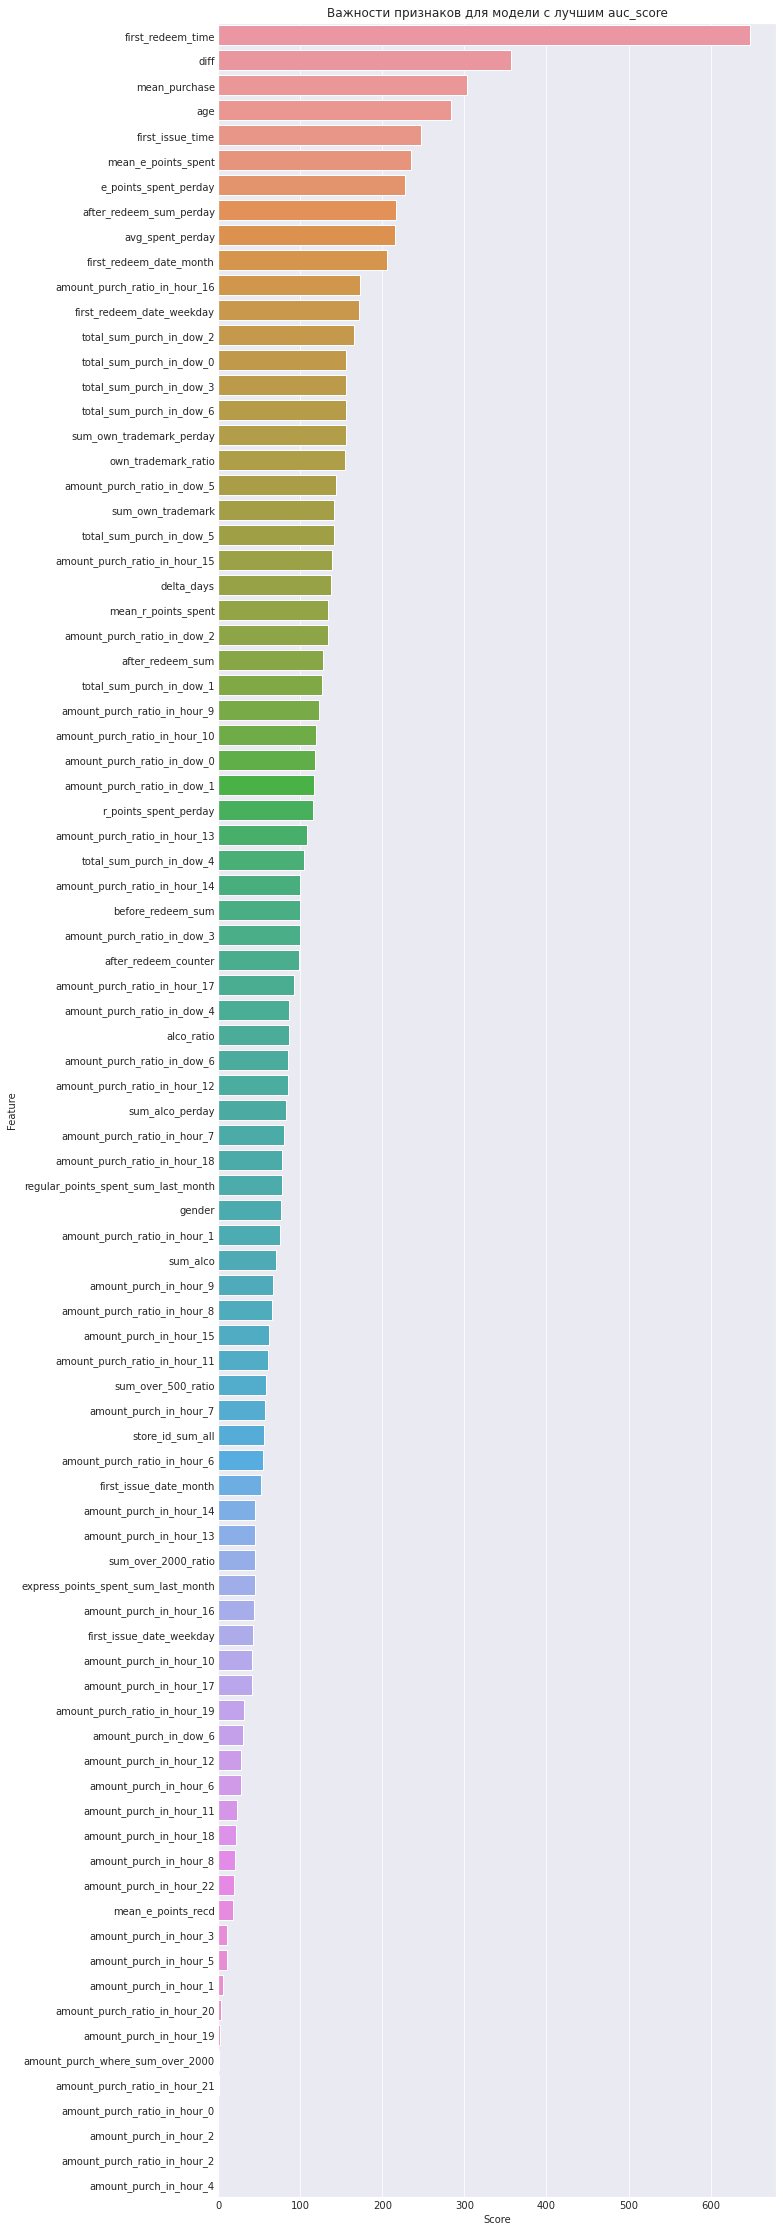

In [78]:
my_predictions_auc_model=get_preds('auc')

Предсказания для лучшей модели относительно `uplift_at_k`
<a id='section_id6.2b'></a>

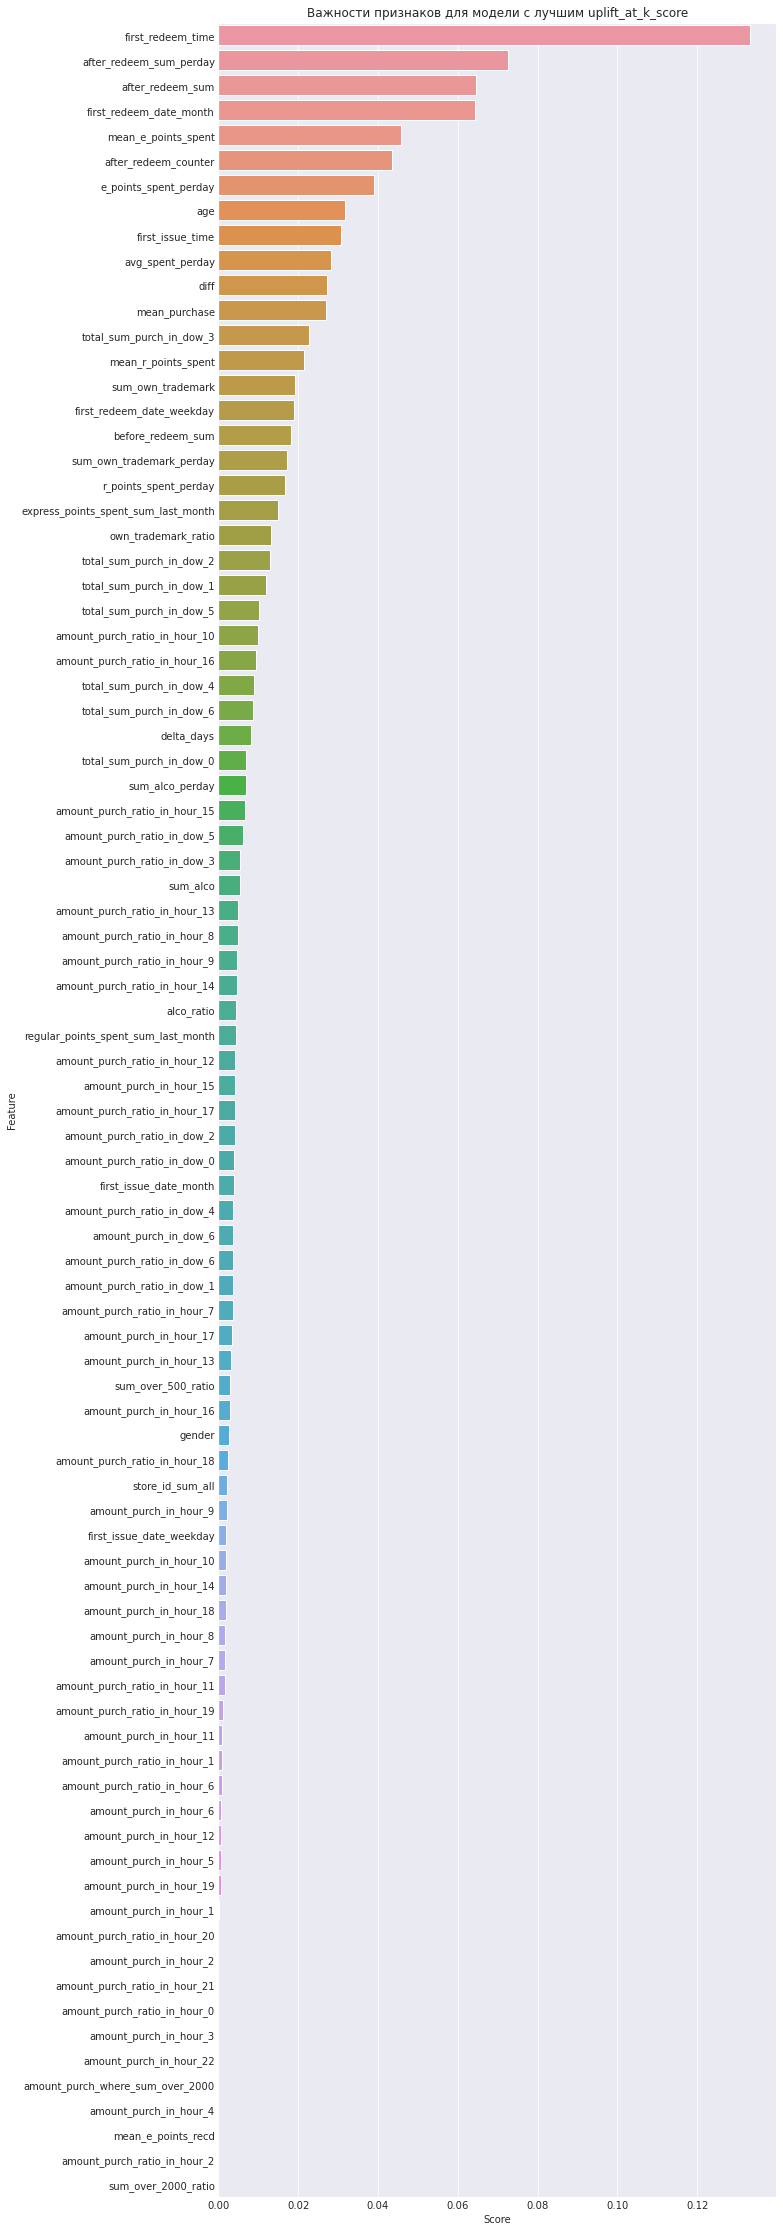

In [79]:
my_predictions_uplift_at_k_model=get_preds('uplift_at_k')

**Функция отображения распределения предсказаний для модели**
<a id='section_id6.3'></a>

In [80]:
def plot_preds(ax, type_best, my_predictions):
    title_label='Распределение предсказаний для модели с лучшим '
    if (type_best=='uplift_at_k'):
        title_label=title_label+type_best+'_score'
    elif (type_best=='auc'):
        title_label=f'{title_label} uplift_{type_best}_score'
    sns.histplot(ax=ax, x='pred', data=my_predictions)
    ax.set(xlabel='prediction', ylabel='amount')
    ax.set_title(label=title_label, 
             fontweight='bold') 
    ax.vlines(x = 0.5, ymin = 0, ymax = 2000,
           colors = 'red')

**Распределения предсказаний для модели с лучшим `uplift_auc_score` и `uplift_at_k_score`**
<a id='section_id6.4'></a>

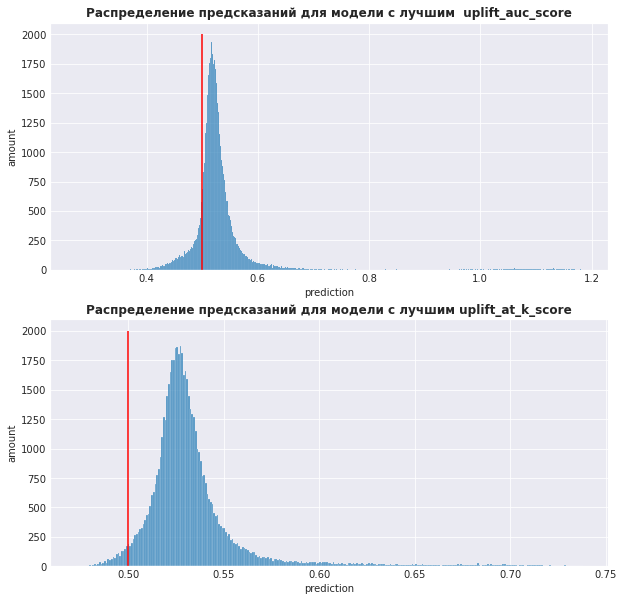

In [81]:
fig, axes = plt.subplots(2,1,figsize=(10,10))
plot_preds(axes[0], 'auc', my_predictions_auc_model)
plot_preds(axes[1], 'uplift_at_k', my_predictions_uplift_at_k_model)
plt.show()

Видно, что предсказания лучшей в плане метрики uplift_at_30% модели более сдвинуты
вправо относительно вертикальной границы классов, т.е. эта модель относит бОльшее количество клиентов к классу 1 (где `treatment_flg` == `purchased`).

# **Выводы**
<a id='section_id7'></a>

Была поставлена задача определить перечень клиентов, которым необходимо разослать СМС с целью побудить их к покупке в магазине. Для этого необходимо было определить величину uplift для каждого клиента, и тем у кого эта величина окажется положительная - отправить СМС. Задача решалась в несколько этапов:

**1.** На первом этапе была выполнена загрузка данных и их первичный анализ. Были выявлены проблемные вопросы в данных и обозначены пути их решения. Анализ данных показал, что мы имеем дело с данными о клиентах магазина, товарах и совершаемых покупках. Также, в наборе данных имелись данные о воздействии на покупателей и реакции на неё среди клиентов входящих в тренировочную выборку.

**2.** Далее, была произведёна предобработка данных, извлечение признаков, удаление лишних признаков и подготовка выборок к обучению моделей. В ходе предобработки были устранены выявленные на первом этапе проблемы в данных - пропуски и недостоверные данные.  По результатам преобразования данных был получен итоговый набор данных состоящий из более 80 признаков. 

**3.** На третьем этапе был произведен выбор подхода к определению аплифта и выбор оптимальной модели машинного обучения. Наибольшее значение аплифта удалось получить с помощью подхода с трансформацией классой. В данном подходе целевая переменная, которая, по сути, была представлена в виде двух колонок (факт взаимодействия с клиентом и факт совершения покупки) преобразуется в один признак по принципу логического "И". Сложность выбора модели и подбора гиперпараметров заключалась в том, что значение аплифта было очень небольшим (не больше 0.1), а от этого данные сильно "шумели", приходилось долго подбирать оптимальные гиперпараметры с помощью библиотеки `hyperopt`. 

**4.** Тестирование финальных моделей показало показало следующие метрики качества: 
uplift_at_30% = 0.082 +- 0.010, uplift_auc_score: 0.035+- 0.006, 
uplift_qini_score: 0.024 +- 0.004 (в случае с моделью `ClassTransformation + RandomForest`) и uplift_at_30% = 0.082 +- 0.006, uplift_auc_score: 0.036 +- 0.005,
uplift_qini_score: 0.025 +- 0.003 (в случае с моделью `ClassTransformation + LGBMClassifier`). Видно, что во втором случае погрешности меньше, что логично, ведь первая модель с большей уверенностью относит клиентов к тому или иному классу (т.е. вероятность для каждого клиента в первой модели больше отличается от граничного значения 0.5 - граница классов). Стоит также заметить, что подбор оптимальных параметров для моделей с классификатором `CatBoost` происходил значительно быстрее, чем в других случаях. Поэтому если встает вопрос исследовать наиболее подробно пространство гиперпараметров, то лучше, наверное, использовать этот классификатор (его scores было совсем чуть-чуть хуже, чем у модели ClassTranformation с LGBM классификатором). 

**$4^*.$** Анализ важности признаков показал, что самыми важными признаками являются дата первого использования бонусных баллов, разность времен между датой первого использования бонусных баллов и датой первой покупки, возраст клиентов, средняя сумма покупки клиентов и другие.
